###  Exploratory Data Analysis (EDA)
- [2.1 Overview](#2_1) 
- [2.2 Summary and Prepping](#2_2) 
  - [2.2.1 Null Handling](#2_2_1)
  - [2.2.2 Basic Summary Statistics](#2_2_2)
- [2.3 Listing Analysis ](#2_3) 
  - [2.3.1 Amenities vs Price](#2_3_1)
    - [2.3.1.1 Top 10 amenitites via count (bar chart)](#2_3_1_1)
    - [2.3.1.2 Hot-Label encoding amenities](#2_3_1_2)
    - [2.3.1.3 Top 10 amenitites via price correlation](#2_3_1_3)
    - [2.3.1.4 Ridge Regression Analysis On Ameneties](#2_3_1_4)
  - [2.3.2 Rooms and Accommodations vs Price](#2_3_2)
    - [2.3.1.1 Correlation Heatmap](#2_3_2_1)
    - [2.3.1.2 Median Prices vs Accomodation](#2_3_2_2)
    - [2.3.1.3 Regression Analysis](#2_3_2_3)
    - [2.3.1.4 Feature Engineering via Clustering (Analysis of Different Types of Travelers)](#2_3_2_4)
    - [2.3.1.5 Preferred Amenities based on different groups?](#2_3_2_5)
  - [2.3.3 Neighborhood vs Price](#2_3_3)
    - [2.3.1.1 Boxplot Analysis of Boroughs and Neighborhoods](#2_3_3_1)
- [2.4 Census Analysis](#2_4)
  - [2.4.1 Income, Rent, and Demographics vs Price](#2_4_1)
    - [2.4.1.1 Correlation Matrix ](#2_4_1_1)
    - [2.4.1.2 Pairplots](#2_4_1_2)
    - [2.4.1.2 Clustering On Income and Rent](#2_4_1_2)
    - [2.4.1.2 Clustering Visualized](#2_4_1_2)
  - [2.4.2 Commute, Transit vs Price](#2_4_2)
    - [2.4.1.1 Analyzing different Price Tiers](#2_4_1_1)
    - [2.4.1.2 T-Test: Does Closer Transit Systems Warrant Price Premium](#2_4_1_2)
    - [2.4.1.3 ANOVA: Does Shorter Commute Time Warrant Price Premium](#2_4_1_2)
- [2.5 Findings and Conclusions](#2_5)
- [2.6 Exporting](#2_6)

### 2.1 Overview <a id = "2_1"></a>

- In our EDA, we compare and identify patterns and trends based on the listing (df_listing_with_zip_codes.csv) and the demographic's (NY_census_demographics.csv) attributes
- By analyzing and evaluating the visualizations and predictive models, we aim to better understand and summarize AirBnB's customer behavior
- Our end goal is to suggest potential actions for stakeholders based on our findings, e.g., how Airbnb prices align with rental markets, areas that might be over- or under-utilized for Airbnb hosting, and recommend prices and strategies to maximize profit

Specifically, we will consider:
- Listing Analysis
  - Amenities vs Price: do specific amenities in a listing increase its price?
  - Rooms and Accommodations vs Price: how does the number of rooms and accommodations affect price?
  - Neighborhood vs Price: does neighborhood affect listing prices? which are more expensive than others?
- Census Analysis
  - Income, Rent, and Demographics vs Price: what are the trends between these attributes? 

### 2.2 Summary and Prepping <a id = "2_2"></a>

In our data cleaning section, we preprocessed the listing and census data, let's take another look at what we have:

In [262]:
#import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', 50)  # Show full content in a column

df_listing = pd.read_csv('df_listing_with_zip_codes.csv')
df_listing.head()

,neighbourhood_cleansed,price,latitude,longitude,room_type,property_type,accommodates,bedrooms,beds,bathrooms,bathrooms_text,amenities,host_is_superhost,neighbourhood_group_cleansed,calculated_host_listings_count,zip_code
0,Fort Hamilton,$89.00,40.614310,-74.034440,Private room,Private room in rental unit,1,1.0,1.0,1.0,1 shared bath,"[""Kitchen"", ""Dedicated workspace"", ""TV"", ""Smok...",f,Brooklyn,1,11209
1,Sunset Park,$45.00,40.639520,-74.014840,Private room,Private room in rental unit,1,1.0,1.0,1.0,1 shared bath,"[""Single level home"", ""Cleaning products"", ""St...",t,Brooklyn,2,11220
2,Morris Heights,$107.00,40.850030,-73.922810,Private room,Private room in rental unit,2,1.0,1.0,1.0,1 shared bath,"[""Kitchen"", ""Hair dryer"", ""Hot water"", ""Dryer""...",f,Bronx,3,10040
3,East Harlem,$140.00,40.798718,-73.940093,Entire home/apt,Entire rental unit,8,3.0,3.0,2.0,2 baths,"[""Building staff"", ""Elevator"", ""Dedicated work...",f,Manhattan,5,10035
4,South Slope,$340.00,40.668012,-73.985226,Entire home/apt,Entire home,5,4.0,4.0,2.5,2.5 baths,"[""BBQ grill"", ""Kitchen"", ""Dedicated workspace""...",f,Brooklyn,3,11215


In [263]:
# bathrooms texts are rather redundant, so we drop bathrooms text
# long and lat are also not necessary since we've already obtained zipcode
df_listing = df_listing.drop(columns=['bathrooms_text','latitude','longitude'])
df_listing.head(3)

,neighbourhood_cleansed,price,room_type,property_type,accommodates,bedrooms,beds,bathrooms,amenities,host_is_superhost,neighbourhood_group_cleansed,calculated_host_listings_count,zip_code
0,Fort Hamilton,$89.00,Private room,Private room in rental unit,1,1.0,1.0,1.0,"[""Kitchen"", ""Dedicated workspace"", ""TV"", ""Smok...",f,Brooklyn,1,11209
1,Sunset Park,$45.00,Private room,Private room in rental unit,1,1.0,1.0,1.0,"[""Single level home"", ""Cleaning products"", ""St...",t,Brooklyn,2,11220
2,Morris Heights,$107.00,Private room,Private room in rental unit,2,1.0,1.0,1.0,"[""Kitchen"", ""Hair dryer"", ""Hot water"", ""Dryer""...",f,Bronx,3,10040


In [264]:
#we will be looking at price a lot, so we need to convert price to float, removing the $ symbol
df_listing['price'] = df_listing['price'].replace('[\$,]', '', regex=True).astype(float)
df_listing.head()

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Andre\AppData\Local\Temp\ipykernel_6540\2935736596.py:2: SyntaxWarning: invalid escape sequence '\$'
  df_listing['price'] = df_listing['price'].replace('[\$,]', '', regex=True).astype(float)


,neighbourhood_cleansed,price,room_type,property_type,accommodates,bedrooms,beds,bathrooms,amenities,host_is_superhost,neighbourhood_group_cleansed,calculated_host_listings_count,zip_code
0,Fort Hamilton,89.0,Private room,Private room in rental unit,1,1.0,1.0,1.0,"[""Kitchen"", ""Dedicated workspace"", ""TV"", ""Smok...",f,Brooklyn,1,11209
1,Sunset Park,45.0,Private room,Private room in rental unit,1,1.0,1.0,1.0,"[""Single level home"", ""Cleaning products"", ""St...",t,Brooklyn,2,11220
2,Morris Heights,107.0,Private room,Private room in rental unit,2,1.0,1.0,1.0,"[""Kitchen"", ""Hair dryer"", ""Hot water"", ""Dryer""...",f,Bronx,3,10040
3,East Harlem,140.0,Entire home/apt,Entire rental unit,8,3.0,3.0,2.0,"[""Building staff"", ""Elevator"", ""Dedicated work...",f,Manhattan,5,10035
4,South Slope,340.0,Entire home/apt,Entire home,5,4.0,4.0,2.5,"[""BBQ grill"", ""Kitchen"", ""Dedicated workspace""...",f,Brooklyn,3,11215


#### 2.2.1 Null Handling <a id = "2_2_1"></a>
- we previous found that bedrooms, beds, and bathrooms are all missing less than 1% of data (as shown in section 1.3 of data cleaning) so we replace the na with the median


In [265]:
df_listing['bedrooms'] = df_listing['bedrooms'].fillna(df_listing['bedrooms'].median())
df_listing['beds'] = df_listing['beds'].fillna(df_listing['beds'].median())
df_listing['bathrooms'] = df_listing['bathrooms'].fillna(df_listing['bathrooms'].median())

#we will also replace missing values for superhost (1.5% of data) with the mode
df_listing['host_is_superhost'] = df_listing['host_is_superhost'].fillna(df_listing['host_is_superhost'].mode()[0])

#check to make sure there's no more missing data
(df_listing.isna().sum()/df_listing.shape[0])  * 100

neighbourhood_cleansed            0.0
price                             0.0
room_type                         0.0
property_type                     0.0
accommodates                      0.0
bedrooms                          0.0
beds                              0.0
bathrooms                         0.0
amenities                         0.0
host_is_superhost                 0.0
neighbourhood_group_cleansed      0.0
calculated_host_listings_count    0.0
zip_code                          0.0
dtype: float64

In [266]:
#read census data

census_data = pd.read_csv('NY_census_demographics.csv')
census_data.head()

,total_population,median_income,median_rent,median_home_value,vacant_units,total_units,avg_commute_time,median_age,non_hispanic_white,hispanic_population,per_capita_income,poverty_count,median_year_built,rent_burden_30_50,total_housing_units,bachelors_degree,workers_public_transit,vehicles_available,zip_code
0,71812.0,88546.0,1801.0,935000.0,3168.0,33347.0,28537.0,40.6,14178.0,43362.0,52048.0,7636.0,33347.0,1605.0,33347.0,7960.0,28537.0,30179.0,11209
1,93008.0,62804.0,1641.0,978800.0,2658.0,30565.0,36683.0,36.0,38012.0,13974.0,25708.0,20513.0,30565.0,1677.0,30565.0,14065.0,36683.0,27907.0,11220
2,43653.0,59115.0,1623.0,454000.0,889.0,17430.0,17098.0,40.3,31339.0,8924.0,35363.0,7806.0,17430.0,824.0,17430.0,5462.0,17098.0,16541.0,10040
3,38595.0,36989.0,1116.0,661800.0,1406.0,16239.0,12539.0,37.1,16604.0,5033.0,30083.0,13268.0,16239.0,1612.0,16239.0,5340.0,12539.0,14833.0,10035
4,72014.0,173899.0,2673.0,1597400.0,2502.0,31967.0,29437.0,37.2,10855.0,48203.0,98246.0,4189.0,31967.0,1382.0,31967.0,2872.0,29437.0,29465.0,11215


In [267]:
#now we merge the two data sets into one on zipcode
df = df_listing.merge(census_data, on='zip_code', how='left')
df.head()

,neighbourhood_cleansed,price,room_type,property_type,accommodates,bedrooms,beds,bathrooms,amenities,host_is_superhost,neighbourhood_group_cleansed,calculated_host_listings_count,zip_code,total_population,median_income,median_rent,median_home_value,vacant_units,total_units,avg_commute_time,median_age,non_hispanic_white,hispanic_population,per_capita_income,poverty_count,median_year_built,rent_burden_30_50,total_housing_units,bachelors_degree,workers_public_transit,vehicles_available
0,Fort Hamilton,89.0,Private room,Private room in rental unit,1,1.0,1.0,1.0,"[""Kitchen"", ""Dedicated workspace"", ""TV"", ""Smok...",f,Brooklyn,1,11209,71812.0,88546.0,1801.0,935000.0,3168.0,33347.0,28537.0,40.6,14178.0,43362.0,52048.0,7636.0,33347.0,1605.0,33347.0,7960.0,28537.0,30179.0
1,Sunset Park,45.0,Private room,Private room in rental unit,1,1.0,1.0,1.0,"[""Single level home"", ""Cleaning products"", ""St...",t,Brooklyn,2,11220,93008.0,62804.0,1641.0,978800.0,2658.0,30565.0,36683.0,36.0,38012.0,13974.0,25708.0,20513.0,30565.0,1677.0,30565.0,14065.0,36683.0,27907.0
2,Morris Heights,107.0,Private room,Private room in rental unit,2,1.0,1.0,1.0,"[""Kitchen"", ""Hair dryer"", ""Hot water"", ""Dryer""...",f,Bronx,3,10040,43653.0,59115.0,1623.0,454000.0,889.0,17430.0,17098.0,40.3,31339.0,8924.0,35363.0,7806.0,17430.0,824.0,17430.0,5462.0,17098.0,16541.0
3,East Harlem,140.0,Entire home/apt,Entire rental unit,8,3.0,3.0,2.0,"[""Building staff"", ""Elevator"", ""Dedicated work...",f,Manhattan,5,10035,38595.0,36989.0,1116.0,661800.0,1406.0,16239.0,12539.0,37.1,16604.0,5033.0,30083.0,13268.0,16239.0,1612.0,16239.0,5340.0,12539.0,14833.0
4,South Slope,340.0,Entire home/apt,Entire home,5,4.0,4.0,2.5,"[""BBQ grill"", ""Kitchen"", ""Dedicated workspace""...",f,Brooklyn,3,11215,72014.0,173899.0,2673.0,1597400.0,2502.0,31967.0,29437.0,37.2,10855.0,48203.0,98246.0,4189.0,31967.0,1382.0,31967.0,2872.0,29437.0,29465.0


In [268]:
#see if there are any unmatched zipcodes
(df.isna().sum()/df.shape[0])  * 100

neighbourhood_cleansed            0.000000
price                             0.000000
room_type                         0.000000
property_type                     0.000000
accommodates                      0.000000
bedrooms                          0.000000
beds                              0.000000
bathrooms                         0.000000
amenities                         0.000000
host_is_superhost                 0.000000
neighbourhood_group_cleansed      0.000000
calculated_host_listings_count    0.000000
zip_code                          0.000000
total_population                  0.618692
median_income                     0.618692
median_rent                       0.618692
median_home_value                 0.618692
vacant_units                      0.618692
total_units                       0.618692
avg_commute_time                  0.618692
median_age                        0.618692
non_hispanic_white                0.618692
hispanic_population               0.618692
per_capita_

In [269]:
# since the unmatched zipcodes make up less than 1% of the data, we will remove them for efficiency
df_listing = df_listing[df_listing['zip_code'].isin(census_data['zip_code'])]
df = df_listing.merge(census_data, on='zip_code', how='left')
df.shape

(22649, 31)

In [270]:
# we also saw that there are some zipcodes with very few listings in 1.4.1, let's take a look again and conclude what we should do with them
df['zip_code'].value_counts(ascending=True).head(20)

zip_code
10152    1
11359    1
10162    1
10110    1
11430    1
11371    1
7093     1
11003    1
11580    1
10169    1
10153    2
10168    2
10279    2
11363    3
10308    4
10115    4
10307    4
11364    4
11239    4
10309    5
Name: count, dtype: int64

In [271]:
#since zipcodes with too few listings might not be the most reliable when analyzing trends, we remove those with less than 5 listings 
#this will ensure less bias/noise while also being more inclusive and not losing too much (as opposed to a threshold of 10 or more)
threshold = 5
valid_zip_codes = df['zip_code'].value_counts()[df['zip_code'].value_counts() >= threshold].index
df = df[df['zip_code'].isin(valid_zip_codes)]
df.shape

(22610, 31)

#### 2.2.2 Summary Statistics Overview <a id = "2_2_2"></a>


In [272]:
pd.options.display.max_columns = None
df.describe()

,price,accommodates,bedrooms,beds,bathrooms,calculated_host_listings_count,zip_code,total_population,median_income,median_rent,median_home_value,vacant_units,total_units,avg_commute_time,median_age,non_hispanic_white,hispanic_population,per_capita_income,poverty_count,median_year_built,rent_burden_30_50,total_housing_units,bachelors_degree,workers_public_transit,vehicles_available
count,22610.000000,22610.000000,22610.000000,22610.000000,22610.000000,22610.000000,22610.000000,22610.000000,2.261000e+04,2.261000e+04,2.261000e+04,22610.000000,22610.000000,22610.000000,2.261000e+04,22610.000000,22610.000000,2.261000e+04,22610.000000,22610.000000,22610.000000,22610.000000,22610.000000,22610.000000,22610.000000
mean,232.392437,2.836223,1.348120,1.626316,1.186975,76.225874,10676.927908,57110.411499,-1.230426e+06,-1.324800e+06,-3.040791e+06,2968.125918,26646.235825,23900.090845,-1.326809e+06,14249.735559,19410.155993,-1.257782e+06,9834.596418,26646.235825,1557.017293,26646.235825,7062.938302,23900.090845,23678.109907
std,1023.583480,2.012330,0.971416,1.199683,0.551169,200.094463,606.844828,25455.682443,2.971700e+07,2.971276e+07,5.162645e+07,2031.215948,10007.550672,10290.269777,2.971267e+07,12625.094559,13350.633308,2.971579e+07,7369.538483,10007.550672,825.374044,10007.550672,5917.616670,10290.269777,9225.087945
min,8.000000,1.000000,0.000000,0.000000,0.000000,1.000000,10001.000000,0.000000,-6.666667e+08,-6.666667e+08,-6.666667e+08,0.000000,0.000000,0.000000,-6.666667e+08,0.000000,0.000000,-6.666667e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,84.000000,2.000000,1.000000,1.000000,1.000000,1.000000,10023.000000,38265.000000,6.510900e+04,1.586000e+03,6.763000e+05,1458.000000,18508.000000,16085.000000,3.420000e+01,6330.000000,9623.000000,3.585700e+04,4097.000000,18508.000000,986.000000,18508.000000,2163.000000,16085.000000,16361.000000
50%,146.000000,2.000000,1.000000,1.000000,1.000000,3.000000,11102.000000,56695.000000,8.775900e+04,1.937000e+03,9.497000e+05,2502.000000,28596.000000,24178.000000,3.660000e+01,8459.000000,17453.000000,4.644200e+04,7636.000000,28596.000000,1437.000000,28596.000000,5340.000000,24178.000000,24987.000000
75%,250.000000,4.000000,2.000000,2.000000,1.000000,17.000000,11222.000000,76518.000000,1.262500e+05,2.550000e+03,1.138900e+06,3596.000000,34581.000000,29216.000000,4.020000e+01,19864.000000,27937.000000,1.003250e+05,14221.000000,34581.000000,1983.000000,34581.000000,10922.000000,29216.000000,31366.000000
max,100000.000000,16.000000,16.000000,42.000000,15.500000,876.000000,11694.000000,112750.000000,2.500010e+05,3.501000e+03,2.000001e+06,9666.000000,47715.000000,52779.000000,5.190000e+01,85529.000000,56909.000000,1.917090e+05,31579.000000,47715.000000,3655.000000,47715.000000,30944.000000,52779.000000,41653.000000


- Mean of our prices points are 232 a night, which is quite costly, potential outliers of luxury listings?
- We have accomdations ranging from 1 to 16, seeing the dynamics between different accomodation types may be worth a while

Now we're ready to analyze our data!

### 2.3 Listing Analysis <a id = "2_3"></a>

#### 2.3.1. Amenities vs Price <a id = "2_3_1"></a>
Here, we want to see whether specific amenities in a listing will increase its price. 
As a result, we can explore trends in consumer preferences and behavior and offer recommendations for:
- Hosts: which amenities to prioritize to maximize their revenue
- Travelers: identify which amenities contribute to most cost and decide whether they are worth it

In [273]:
#split amenities data into list
import re
def amenities(amenities_string):
    return re.split('[","]+', amenities_string)[1:-1:2]

df['amenities'] = df['amenities'].apply(amenities)

#### 2.3.1.1 Top 10 amentities by listing <a id = "2_3_1_1"></a>

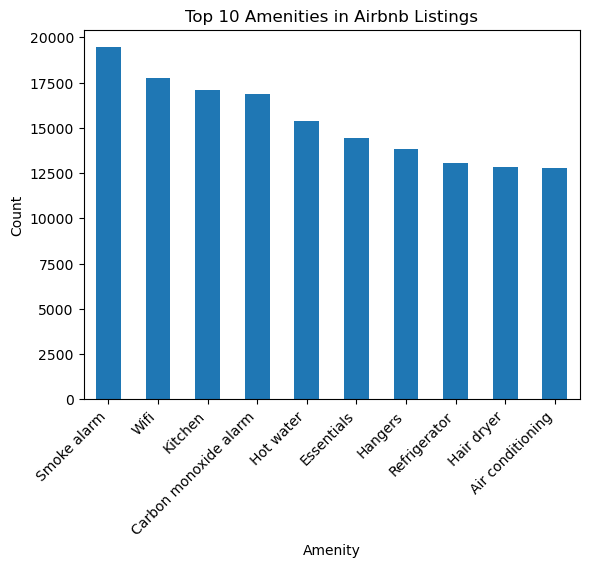

In [274]:
#now, we decide to remove some outliers using IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

#EDA, check how many listings have a particular amenity and identify which amenities are most common
all_amenities = [amenity for sublist in df['amenities'] for amenity in sublist]
all_amenities = [amenity for amenity in all_amenities if amenity != ' ']
amenity_counts = pd.Series(all_amenities).value_counts()

#visualize the frequency of amenities
amenity_counts.head(10).plot(kind='bar')
plt.title('Top 10 Amenities in Airbnb Listings')
plt.xlabel('Amenity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

#### 2.3.1.2 Hot Label Encoding <a id = "2_3_1_2"></a>
Because Amenities is a list, we need to encode each possible attribute to a binary value. This will make EDA (and later ML process) more doable

The graph above makes sense, all the amenities in the top 10 are necessary for everyday living. Next, we want to see if there are any specific amenities that drastically increase prices. We hypothesize that there is some sort of trend and that these amenities are likely not necessary, but nice to have.

In [275]:
#get more common amenities (so less time is used when executing code)
threshold = 10
common_amenities = amenity_counts[amenity_counts >= threshold]
common_amenities

Smoke alarm                                          19451
Wifi                                                 17767
Kitchen                                              17111
Carbon monoxide alarm                                16900
Hot water                                            15381
                                                     ...  
65 inch HDTV with Fire TV                               10
Kenmore gas stove                                       10
60 inch HDTV with Netflix                               10
Free driveway parking on premises \u2013 2 spaces       10
65 inch HDTV with HBO Max                               10
Name: count, Length: 464, dtype: int64

In [276]:
#now we create binary for amenities to see which amenities increase price
amenities_price = df[['amenities','price']].copy()
binary_columns = {amenity: amenities_price['amenities'].apply(lambda x: int(amenity in x)) for amenity in common_amenities.index}

#merge dataframes
binary_columns_df = pd.DataFrame(binary_columns)
amenities_price = pd.concat([amenities_price, binary_columns_df], axis=1)
amenities_price = amenities_price.drop(columns=['amenities'])
amenities_price.head()

,price,Smoke alarm,Wifi,Kitchen,Carbon monoxide alarm,Hot water,Essentials,Hangers,Refrigerator,Hair dryer,Air conditioning,Iron,Heating,Cooking basics,Dishes and silverware,Bed linens,Dedicated workspace,Microwave,TV,Shampoo,Fire extinguisher,Self check-in,Long term stays allowed,Free street parking,Oven,Cleaning products,Coffee maker,First aid kit,Stove,Extra pillows and blankets,Bathtub,Freezer,Dining table,Hot water kettle,Exterior security cameras on property,Dishwasher,Laundromat nearby,Private entrance,Wine glasses,Shower gel,Body soap,Toaster,Washer,Room-darkening shades,Luggage dropoff allowed,Conditioner,Lockbox,Pets allowed,Coffee,Lock on bedroom door,Elevator,Dryer,Window AC unit,Clothing storage,Host greets you,Central heating,Blender,Baking sheet,Clothing storage: closet,Books and reading material,Free parking on premises,Keypad,Portable fans,Outdoor dining area,Outdoor furniture,TV with standard cable,Cleaning available during stay,Mini fridge,Ethernet connection,Gym,Radiant heating,Ceiling fan,Paid parking off premises,Free dryer \u2013 In unit,Coffee maker: drip coffee maker,Crib,BBQ grill,Gas stove,Clothing storage: closet and dresser,Safe,Smart lock,Single level home,Drying rack for clothing,Building staff,Free washer \u2013 In unit,Private patio or balcony,Backyard,Patio or balcony,Rice maker,Window guards,Central air conditioning,Paid washer \u2013 In building,High chair,Exercise equipment,Stainless steel oven,Paid dryer \u2013 In building,Paid parking on premises,Board games,Coffee maker: Keurig coffee machine,City skyline view,Private backyard \u2013 Fully fenced,Trash compactor,Hot tub,Mosquito net,Pack \u2019n play/Travel crib,AC - split type ductless system,Barbecue utensils,Paid parking garage off premises,Shared patio or balcony,Bidet,Private living room,Netflix,Garden view,Electric stove,Children\u2019s books and toys,Indoor fireplace,Fire pit,Babysitter recommendations,Children\u2019s dinnerware,Sound system,Stainless steel gas stove,Smoking allowed,Portable heater,Heating - split type ductless system,Dryer \u2013 In building,Breakfast,Washer \u2013\u00a0In building,Hulu,Courtyard view,Dryer \u2013\u00a0In unit,Portable air conditioning,Outlet covers,Shared backyard \u2013 Fully fenced,Free dryer \u2013 In building,Washer \u2013\u00a0In unit,Shared gym in building,Coffee maker: french press,HBO Max,Piano,Clothing storage: dresser,Stainless steel single oven,Kitchenette,Paid street parking off premises,Pack \u2019n play/Travel crib - available upon request,Coffee maker: pour-over coffee,Disney+,Clothing storage: walk-in closet,Free washer \u2013 In building,and dresser,Noise decibel monitors on property,Waterfront,Dove body soap,Coffee maker: Nespresso,Roku,Park view,Bluetooth sound system,Record player,Pool table,Pocket wifi,Clothing storage: wardrobe,Amazon Prime Video,Sun loungers,Hammock,Exercise equipment: free weights,Bikes,Coffee maker: espresso machine,Single oven,Pool,HDTV,HDTV with Netflix,Beach access \u2013 Beachfront,standard cable,Crib - available upon request,Fire TV,Stainless steel stove,Indoor fireplace: electric,HDTV with Amazon Prime Video,River view,Beach essentials,Shared beach access,Apple TV,Baby safety gates,Baby bath,Clothing storage: closet and wardrobe,Bread maker,Game console,55 inch HDTV with Amazon Prime Video,Housekeeping - available at extra cost,HDTV with Roku,Paid parking lot off premises,Exercise equipment: yoga mat,Outdoor playground,yoga mat,Stainless steel electric stove,Clothing storage: walk-in closet and closet,Private hot tub,wardrobe,premium cable,Theme room,Bay view,EV charger,50 inch HDTV with Amazon Prime Video,Fireplace guards,Movie theater,Clothing storage: wardrobe and dresser,Free dryer,Chromecast,Induction stove,HDTV with standard cable,Private backyard,Free driveway parking on premises \u2013 1 space,Resort access,TV with Roku,Outdoor shower,Shared gym nearby,Dove conditioner,Pack \u2019n play/Travel crib - always at the listing,TV with Netflix,GE

#### 2.3.1.3 Top 10 amenities based on price correlation <a id = "2_3_1_3"></a>

Crib                          0.366815
Gym                           0.342465
High chair                    0.315156
Elevator                      0.300639
Dishwasher                    0.294852
Pets allowed                  0.272646
Hair dryer                    0.266584
Shampoo                       0.248790
Dryer \u2013\u00a0In unit     0.246299
Washer \u2013\u00a0In unit    0.245990
Name: price, dtype: float64


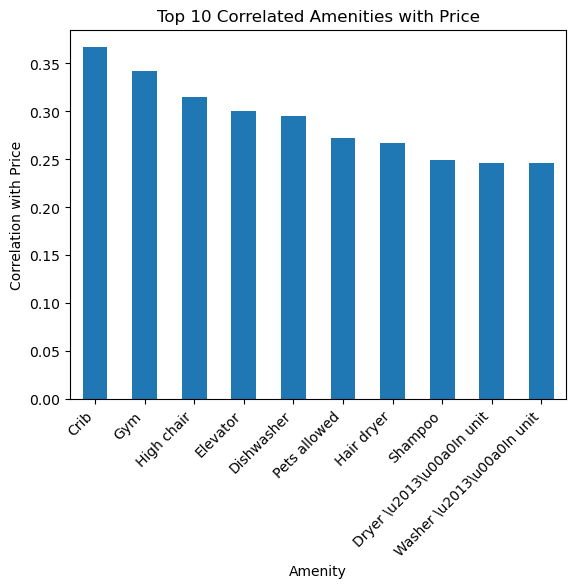

In [277]:
#correlation between amenities and price
amenities_corr = amenities_price.corr()['price'].drop('price')
print(amenities_corr.sort_values(ascending=False).head(10))

#visualize the top 10 correlated amenities
amenities_corr.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Correlated Amenities with Price')
plt.xlabel('Amenity')
plt.ylabel('Correlation with Price')
plt.xticks(rotation=45, ha='right')
plt.show()

- The amenities here make sense to us. Just as we hypothesized, these amenities are not as necessary, but definitely nice to have depending on the customer's values and circumstances.
- The correlation coefficient for the top ten ranges from 0.25 to 0.35, which is not considered very strong.
- However, we can say that there is a moderately positive correlation between price and having a crib, gym, high chair, elevator, or dishwasher.
    - As a result, we can suggest that these amenities might be good to have if hosts want to increase their revenues, of course while keeping cost in account as well
    - Customers can consider whether these amenities are worth to them or not.
- Meanwhile, there is a weaker correlation between price and having pets allowed, a hairdryer, shampoo, in-unit washer, or in-unit dryer.
     - These amenities show to increase price with less confidence, but could still be something to consider for both hosts and customers
- We do a regression next to better understand the relationship between a price and multiple amenities.

#### 2.3.1.4 Ridge Regression to Validate Correlation <a id = "2_3_1_4"></a>

In [278]:
pip install scikit-learn

R-squared: 0.43051997493344585
Mean Squared Error: 6537.34972190108


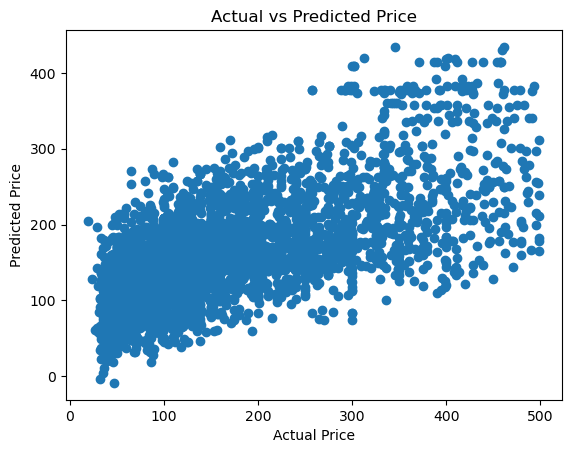

In [279]:
#regression using ridge to address multicollinearity
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


x = amenities_price.drop(columns=['price'])
y = amenities_price['price']

#standardize
scaler = StandardScaler()
x = scaler.fit_transform(x)

#train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = Lasso()
model.fit(x_train, y_train)

# evaluate model
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

# visualize the predicted vs actual price
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

- The R2 is 0.43, suggesting the model explains 40% of variance and is capturing moderately meaningful relationships between amenities and price
- The MSE of 6537 suggest our predictions are not the most accurate here, likely because there are lots of other factors that affect price.
- Thus, we conclude that there are meaningful relationships between amenities and price, but in general, it's worth experimenting with other approaches to improve prediction accuracy, which we will do later on.

### 2.3.2 Rooms and Accommodations vs Price <a id = "2_3_2"></a>
In this section, we see how the number of rooms, bathrooms, beds, and number of people accommodated affect price gain insights on pricing dynamics in relation to property size and capacity.
- what are some general trends when it comes to rooms and accommodations
- what is the median price based on what rooms are desirable

In [280]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


#### 2.3.2.1 Correlation Heatmap <a id = "2_3_2_1"></a>

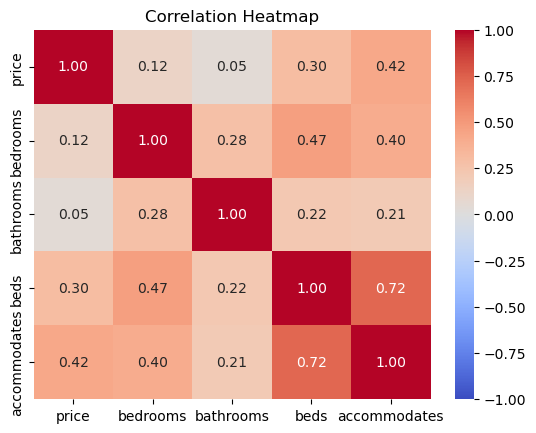

In [281]:
import seaborn as sns
# compute correlation matrix
correlation_matrix = df[['price', 'bedrooms', 'bathrooms', 'beds', 'accommodates']].corr()

# create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Correlations to note:
- accommodates and price have a moderately positive correlation (.42)
- beds and price have a moderately positive correlation, but not as strong as accommodates (.30)
- this means that generally, as the the number of people accommodated and/or the number of beds increases, then price will increase
- this also means that bathrooms and bedrooms aren't typically associated with a higher price on the listing

#### 2.3.2.2 Median prices based on accomodations and rooms <a id = "2_3_2_2"></a>
Sometimes, guests care about specific number of beds based on people accommodated. We can take a look at median price based on these two variables.

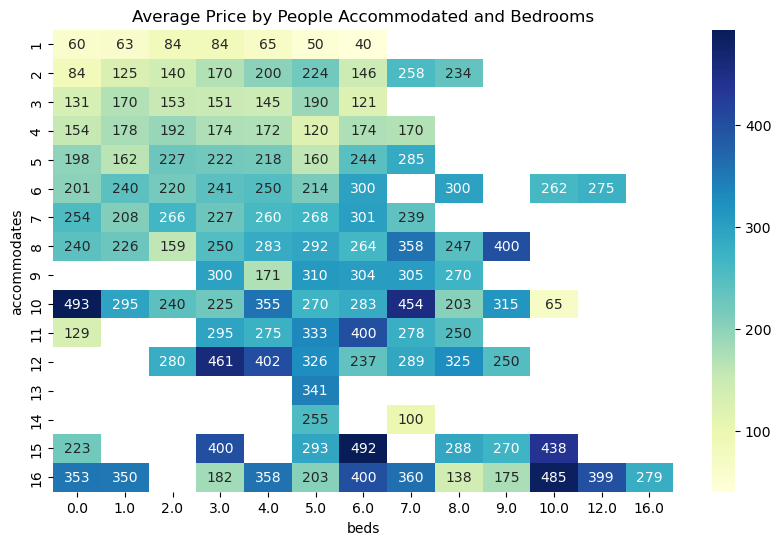

In [282]:
# pivot table average price
pivot_table = df.pivot_table(values='price', index='accommodates', columns='beds', aggfunc='median')

# create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".0f")
plt.title('Average Price by People Accommodated and Bedrooms')
plt.xlabel('beds')
plt.ylabel('accommodates')
plt.show()

Unsurprisingly, more people and more beds generally have a more expensive listing, but not necessarily. As noted above, the correlation between these two features and price is only moderately positive, so some listings are worth investigating if guests want to save money. Additionally, if a host wants to increase the price, this doesn't necessarily mean they should add another bed since sometimes, the price decreases with more beds, probably because people would be more cramped.

#### 2.3.2.3 Linear and Lasso Regression <a id = "2_3_2_3"></a>

R-squared: 0.5117832388031758
Mean Squared Error: 5604.487545747548
Coefficient of accommodate: 30.42220516976378
Intercept: 162.57830571342123
52.617253156985946


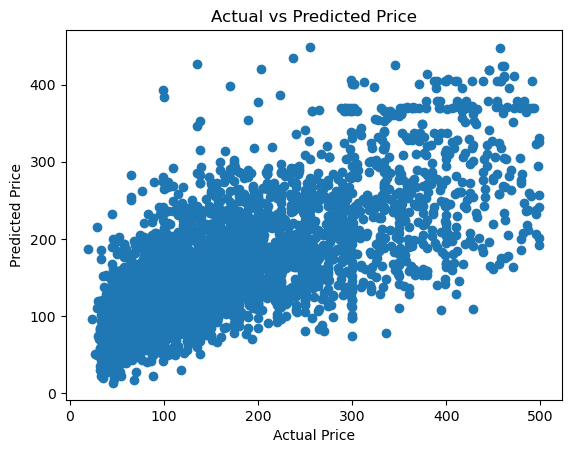

In [283]:
from sklearn.linear_model import LinearRegression, Lasso

#perform multiple linear regression using ridge to address the multicollinearity seen in the heat map
#adding rooms and beds to amenities to get more factors
amenities_rooms_price = pd.concat([amenities_price, df[['bedrooms', 'bathrooms', 'beds', 'accommodates']]], axis=1)
x = amenities_rooms_price.drop(columns=['price'])
y = amenities_rooms_price['price']

original_std = x['accommodates'].std()

#standardize
scaler = StandardScaler()
x = scaler.fit_transform(x)

#train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = Lasso()
model.fit(x_train, y_train)

# evaluate model
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print("Coefficient of accommodate:", model.coef_[-1]) #want to see accommodate since it's most correlated with price
print("Intercept:", model.intercept_)

#get price increase
accommodates_coeff = model.coef_[-1]
interpretable_coeff = accommodates_coeff * original_std
print(interpretable_coeff)

# visualize the predicted vs actual price
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

- Based on these results, one extra person accommodated will increase the listing price by about $53 on average
- Additionally, this model now accounts for 51% of the variance, which is better than just counting amenities. However, the R squared is still rather large, which means there are still more factors we should consider.
- Let's take a look at how price per person varies for different listings

In [284]:
df['price_per_person'] = df['price'] / df['accommodates']
df.head()

,neighbourhood_cleansed,price,room_type,property_type,accommodates,bedrooms,beds,bathrooms,amenities,host_is_superhost,neighbourhood_group_cleansed,calculated_host_listings_count,zip_code,total_population,median_income,median_rent,median_home_value,vacant_units,total_units,avg_commute_time,median_age,non_hispanic_white,hispanic_population,per_capita_income,poverty_count,median_year_built,rent_burden_30_50,total_housing_units,bachelors_degree,workers_public_transit,vehicles_available,price_per_person
0,Fort Hamilton,89.0,Private room,Private room in rental unit,1,1.0,1.0,1.0,"[Kitchen, Dedicated workspace, TV, Smoke alarm...",f,Brooklyn,1,11209,71812.0,88546.0,1801.0,935000.0,3168.0,33347.0,28537.0,40.6,14178.0,43362.0,52048.0,7636.0,33347.0,1605.0,33347.0,7960.0,28537.0,30179.0,89.0
1,Sunset Park,45.0,Private room,Private room in rental unit,1,1.0,1.0,1.0,"[Single level home, Cleaning products, Stove, ...",t,Brooklyn,2,11220,93008.0,62804.0,1641.0,978800.0,2658.0,30565.0,36683.0,36.0,38012.0,13974.0,25708.0,20513.0,30565.0,1677.0,30565.0,14065.0,36683.0,27907.0,45.0
2,Morris Heights,107.0,Private room,Private room in rental unit,2,1.0,1.0,1.0,"[Kitchen, Hair dryer, Hot water, Dryer, Iron, ...",f,Bronx,3,10040,43653.0,59115.0,1623.0,454000.0,889.0,17430.0,17098.0,40.3,31339.0,8924.0,35363.0,7806.0,17430.0,824.0,17430.0,5462.0,17098.0,16541.0,53.5
3,East Harlem,140.0,Entire home/apt,Entire rental unit,8,3.0,3.0,2.0,"[Building staff, Elevator, Dedicated workspace...",f,Manhattan,5,10035,38595.0,36989.0,1116.0,661800.0,1406.0,16239.0,12539.0,37.1,16604.0,5033.0,30083.0,13268.0,16239.0,1612.0,16239.0,5340.0,12539.0,14833.0,17.5
4,South Slope,340.0,Entire home/apt,Entire home,5,4.0,4.0,2.5,"[BBQ grill, Kitchen, Dedicated workspace, TV, ...",f,Brooklyn,3,11215,72014.0,173899.0,2673.0,1597400.0,2502.0,31967.0,29437.0,37.2,10855.0,48203.0,98246.0,4189.0,31967.0,1382.0,31967.0,2872.0,29437.0,29465.0,68.0


#### 2.3.2.4 Clustering Listings (type of travelers) <a id = "2_3_2_4"></a>
- Rooms and Accomdations may determine, but a attribute to determine about listings is the 'luxury-ness' of a listing
- There may be different purchasing behaviors based on those listings, let's use clustering to identify this:

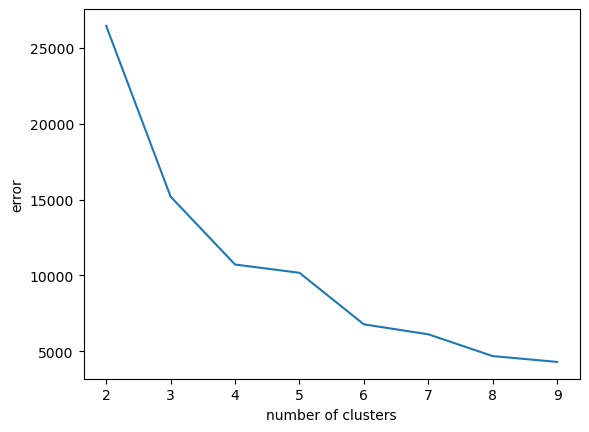

In [285]:
#we now perform clustering to see if we can categorize these listings into different groups
#elbow method
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = df[['price_per_person', 'accommodates']]
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

errors=[]
for n in range(2,10): 
    kmeans=KMeans(n) 
    kmeans.fit(scaled) 
    errors.append(kmeans.inertia_)

plt.plot(range(2,10),errors) 
plt.xlabel('number of clusters'); 
plt.ylabel('error');

             beds  bathrooms  accommodates  price_per_person
cluster                                                     
0        1.344103   1.124691      2.249967         55.469483
1        1.222188   1.049135      1.896786        157.477261
2        3.389279   1.437610      6.470562         40.840722


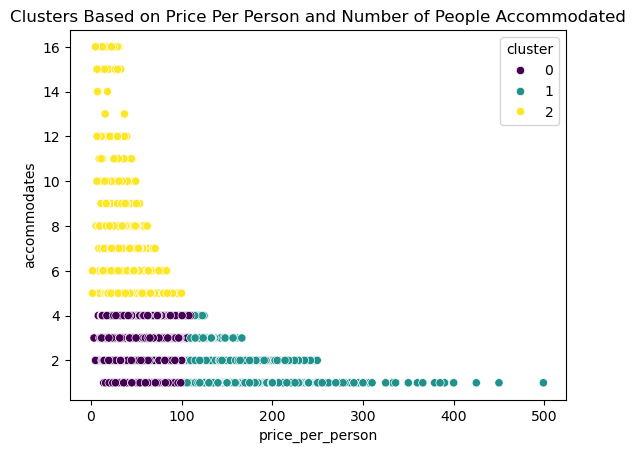

In [289]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#clustering
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(scaled)
cluster_summary = df.groupby('cluster').agg({'beds': 'mean', 'bathrooms': 'mean', 'accommodates': 'mean', 'price_per_person': 'mean'})
print(cluster_summary)

sns.scatterplot(data=df, x='price_per_person', y='accommodates', hue='cluster', palette='viridis')
plt.title('Clusters Based on Price Per Person and Number of People Accommodated')
plt.show()

The listings fall into 3 different groups:
- One accommodates a small group of people at a low to medium price. this is likely budget-friendly.
- One accommodates a small group at a medium to very high price. this listing is likely luxury.
- one accommodates a very large group of people for a small price. this is likely for families or large groups with a tighter budget


We will evaluate each one of these clusters

<Axes: xlabel='cluster', ylabel='price_per_person'>

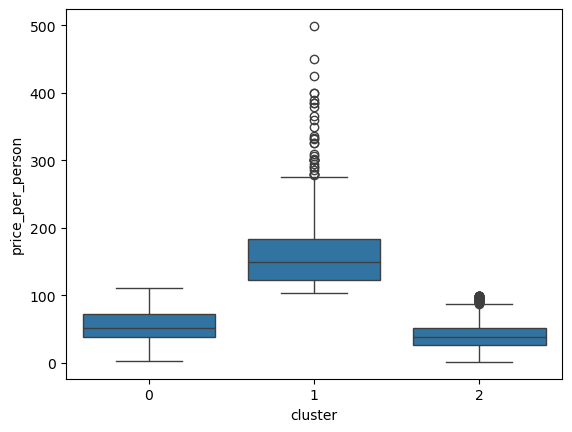

In [291]:
sns.boxplot(x='cluster', y='price_per_person', data=df)

Let's further analyze these clusters and see what we can derive from this

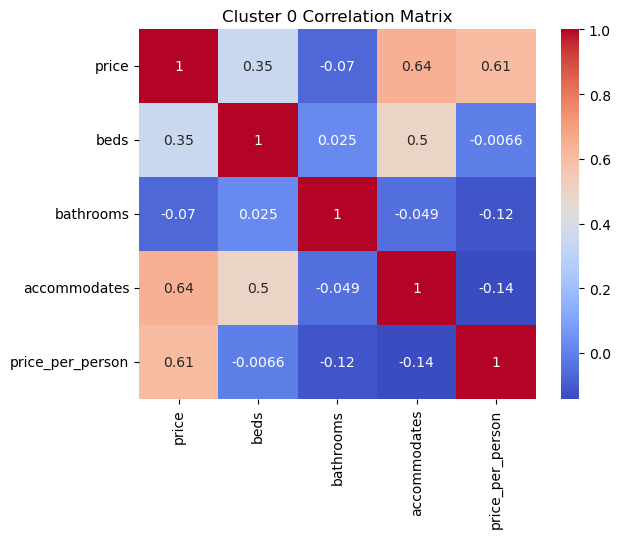

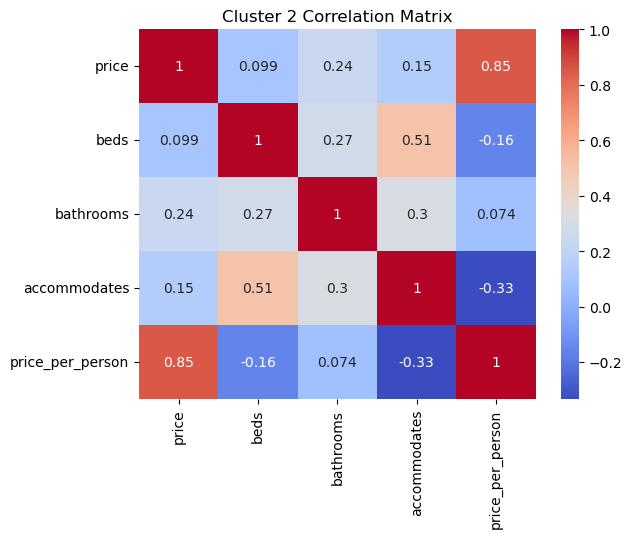

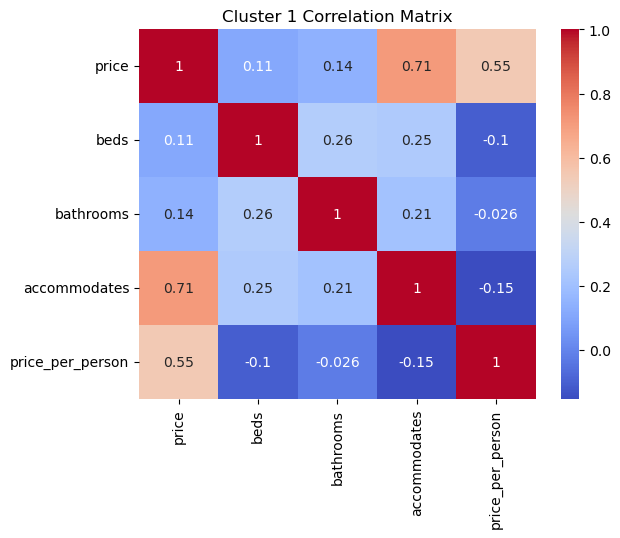

In [ ]:
for cluster in df['cluster'].unique():
    # print(f"Cluster {cluster} Correlation Matrix")
    cluster_df = df[df['cluster'] == cluster]
    corr_matrix = cluster_df[['price', 'beds', 'bathrooms', 'accommodates', 'price_per_person']].corr()
    # print(corr_matrix)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(f"Cluster {cluster} Correlation Matrix")
    plt.show()

Based on these correlation matrices of different travel groups, we come to the following conclusion:

** Cluster 0 (Budget-Friendly Small Groups)
- Price increases with the number of people accommodated (strong correlation: 0.64).
- Price per person rises consistently with overall price (0.61).
  
** Cluster 1 (Luxury Small Groups)
- Price is heavily driven by the number of people accommodated (0.71).
- Beds and bathrooms have minimal influence on price (0.10 and 0.14 correlations). Price has a moderately positive correlation with accommodate.
- If budget listings increase the number of people accommodated, they could gain more profit.

** Cluster 2 (Budget-Friendly Large Groups)
- Larger listings charge less per person (negative correlation: -0.33).
- Price per person strongly correlates with overall price (0.85).


#### Actionable Insights

Cluster 0: 
- Focus on maximizing occupancy with efficient use of space.
- Invest in affordable, high-utility amenities to attract budget-conscious guests.

Cluster 1: Emphasize exclusivity and high-end finishes for smaller setups.
- Enhance luxury features (e.g., upscale interiors, concierge services) to justify premium pricing.
- Market listings as exclusive and private for discerning travelers.

Cluster 2:
- Optimize listings for group capacity with functional, affordable spaces.
- Add group-friendly features (e.g., large dining areas, parking) and emphasize affordability in marketing.

#### 2.3.2.5 Target Amenities <a id = "2_3_3_1"></a>

Now aware of different purchasing behavior of different clusters, let's revist amenities to see which amentities has the highest correlation of prices

In [294]:
# Add cluster information to the amenities_price dataframe
amenities_price = pd.concat([amenities_price, df['cluster']], axis=1)

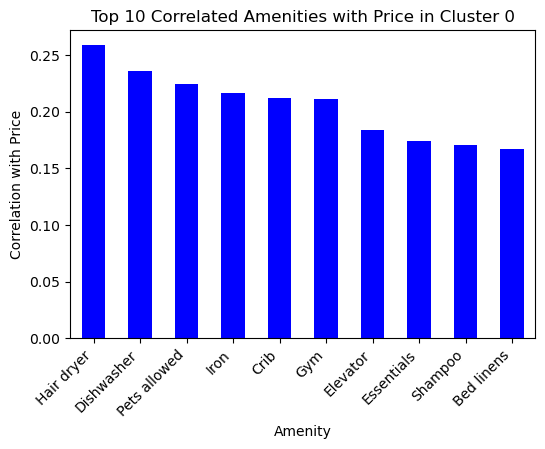

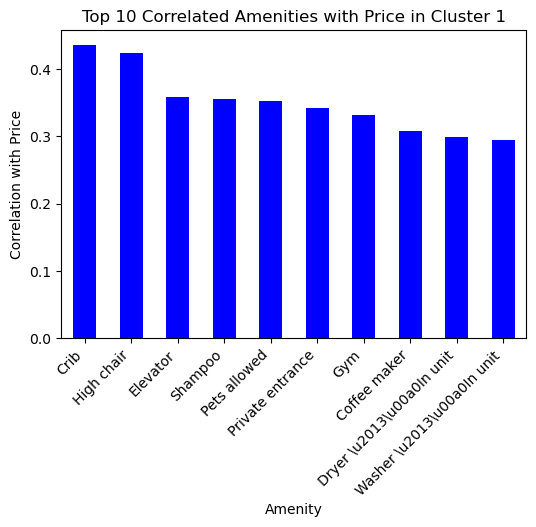

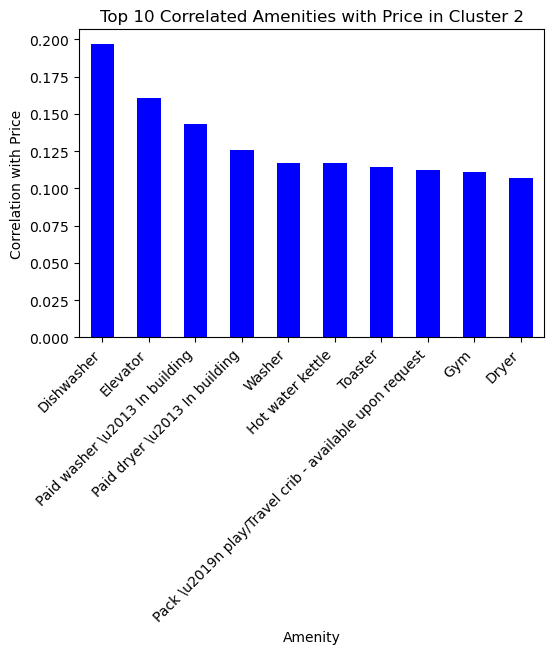

In [298]:
# Analyze correlations for each cluster
cluster_top_10 = {}
for cluster_id in sorted(df['cluster'].unique()):
    cluster_data = amenities_price[amenities_price['cluster'] == cluster_id]
    cluster_corr = cluster_data.corr()['price'].drop('price').sort_values(ascending=False)
    cluster_top_10[cluster_id] = cluster_corr.head(10)
    # print(f"Top 10 Amenities for Cluster {cluster_id}:")
    # print(cluster_top_10[cluster_id])
    # print("\n")

for cluster_id, amenities in cluster_top_10.items():
    plt.figure(figsize=(6, 4))
    amenities.plot(kind='bar', color='blue')
    plt.title(f'Top 10 Correlated Amenities with Price in Cluster {cluster_id}')
    plt.xlabel('Amenity')
    plt.ylabel('Correlation with Price')
    plt.xticks(rotation=45, ha='right')
    plt.show()


#### Cluster 0 (Budget-Friendly Small Groups)
  - Amenities focus on **basic conveniences** (e.g., hair dryer, iron) and **pet-friendly options**.  
  - Slight emphasis on **family-oriented amenities** like cribs and essential utilities.  
  - Enhance listings with **practical, low-cost amenities** to appeal to budget-conscious travelers.  
  - Highlight **pet-friendly** and **family-focused features** in marketing.  

---

#### Cluster 1 (Luxury Small Groups)
  - Luxury-focused amenities dominate (e.g., private entrance, gym, in-unit washer/dryer).  
  - Strong emphasis on **family-friendly premium options** like cribs and high chairs.  
  - Focus on **high-end, exclusive amenities** to cater to luxury travelers.  
  - Showcase **family-friendly premium features** to attract affluent families.  

---

#### Cluster 2 (Budget-Friendly Large Groups)
  - Features reflect **functional and group-oriented needs** (e.g., dishwasher, paid laundry facilities).  
  - Some emphasis on **basic family amenities** like cribs and hot water kettles.  
  - Optimize listings for **group convenience** with shared-use amenities like washers and dryers.  
  - Highlight **affordable utility amenities** to attract budget-conscious large groups.

---

### Overall Trend
- Pet-friendly features consistently correlate with higher prices.
- Luxury amenities (pools, dining setups) and practical features (washers/dryers) dominate pricing patterns across clusters.

---

### 2.3.3 Neighborhood vs Price <a id = "2_3_3"></a>
In this section, we want to see how different neighborhoods or boroughs could affect listing prices. We are solely looking at just the neighborhoods/boroughs here and not their demographic information just yet, just so we can get a general sense of the patterns between neighborhood and listing prices.
- if hosts and customers are solely interested in price, they can consider which neighborhood/borough to get the listing from based on these results

#### 2.3.3.1 Boxplot Distributions of boroughs and prices <a id = "2_3_3_1"></a>

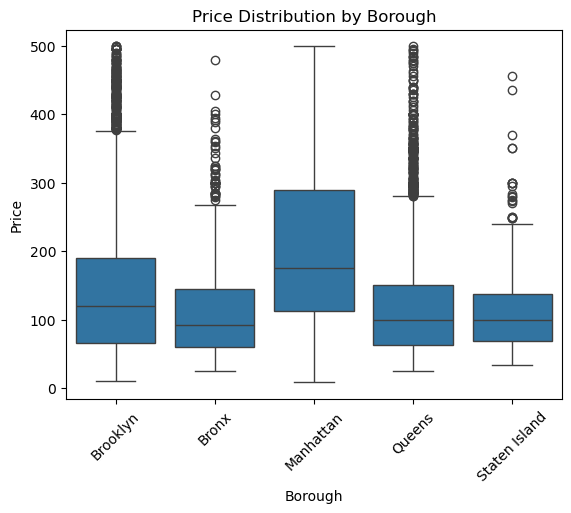

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

#boxplot for boroughs and price
sns.boxplot(x='neighbourhood_group_cleansed', y='price', data=df)
plt.title('Price Distribution by Borough')
plt.xticks(rotation=45)
plt.xlabel('Borough')
plt.ylabel('Price')
plt.show()

In [178]:
#get median price of each borough
df.groupby('neighbourhood_group_cleansed')['price'].median().reset_index()

,neighbourhood_group_cleansed,price
0,Bronx,92.5
1,Brooklyn,120.0
2,Manhattan,175.0
3,Queens,99.0
4,Staten Island,99.0


c:\Users\Andre\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


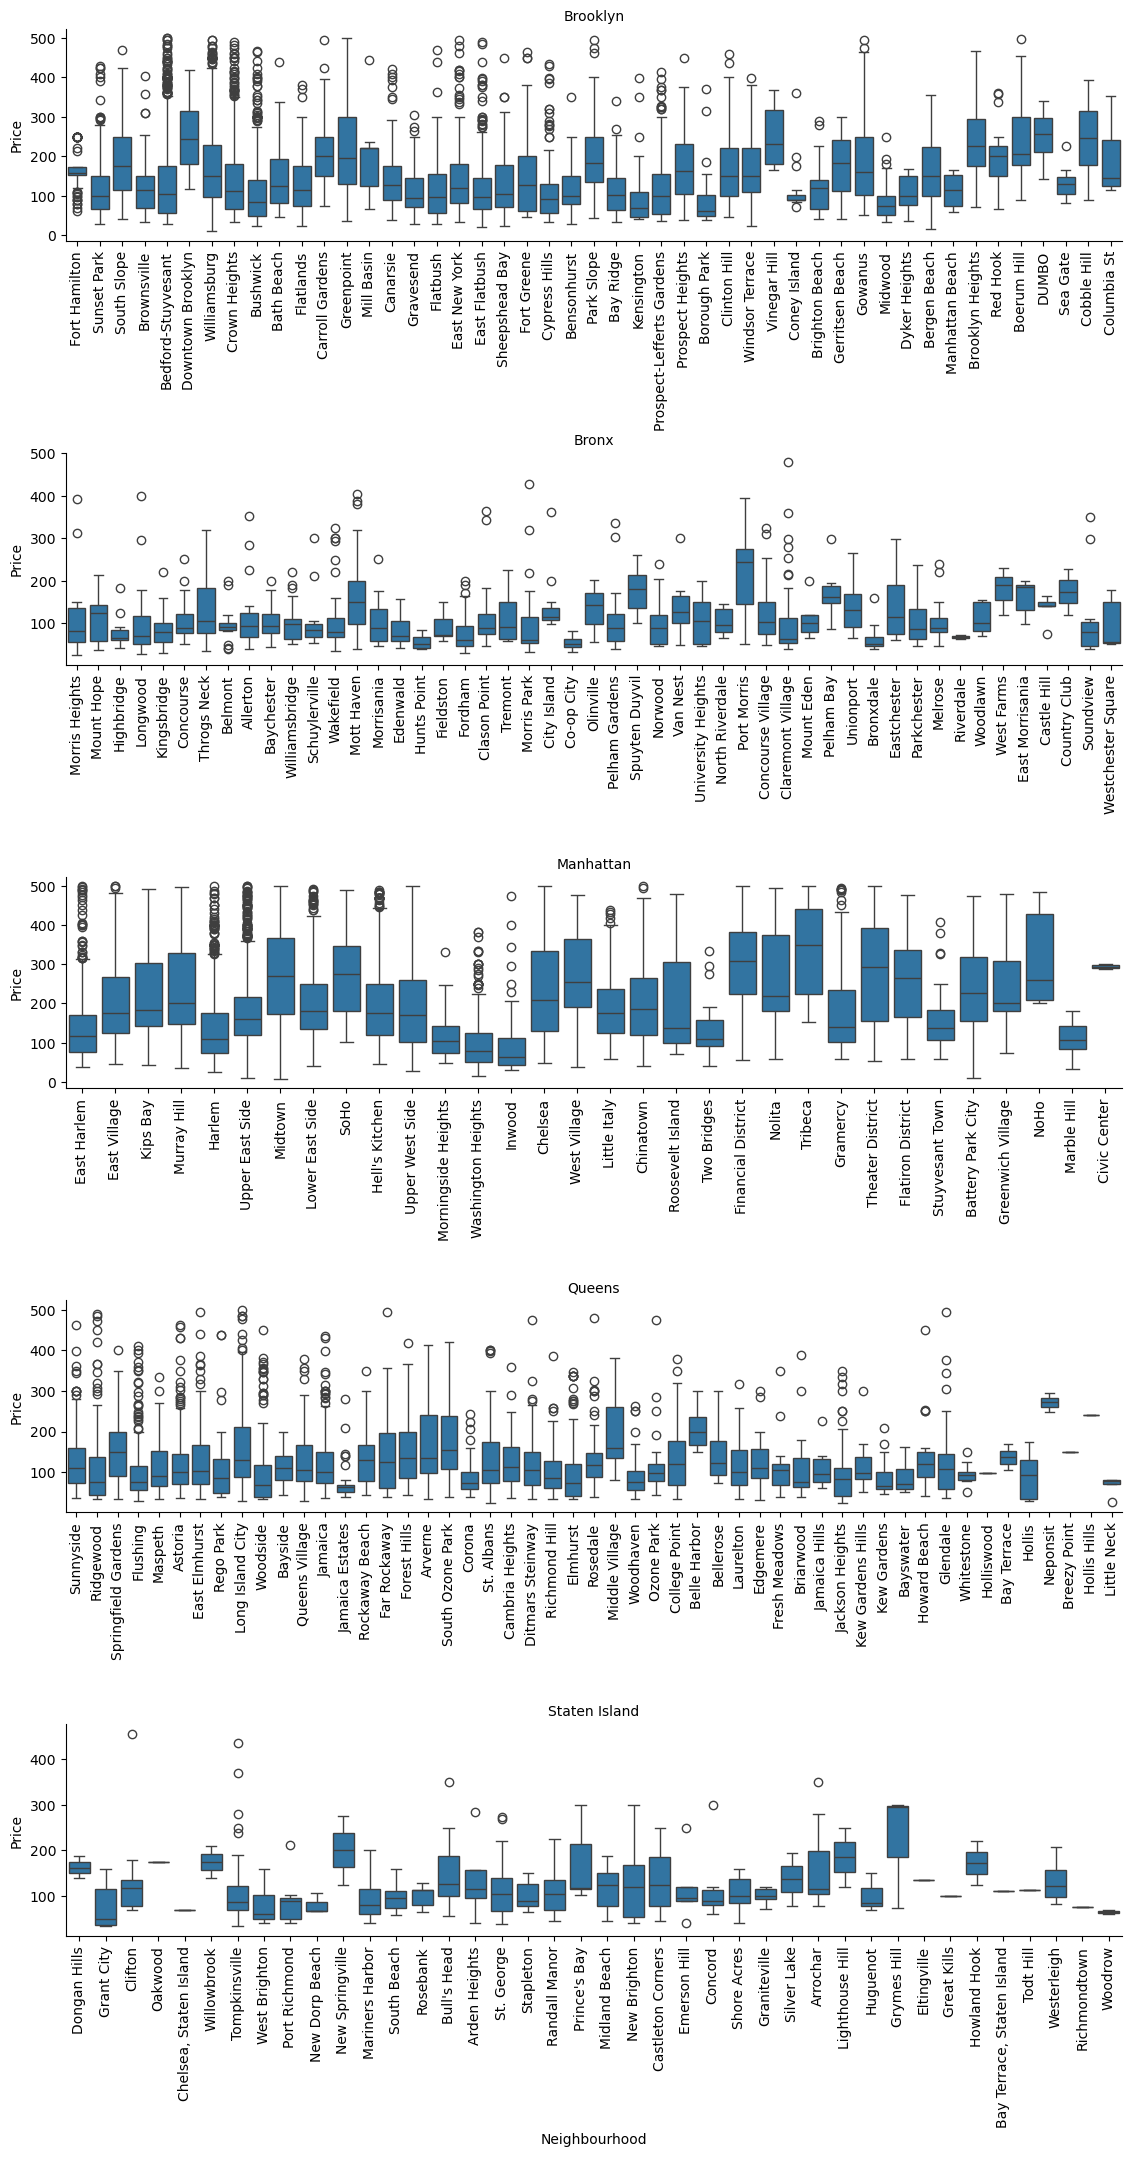

In [179]:
# facetgrid for each borough and its neighborhoods
g = sns.FacetGrid(df, col='neighbourhood_group_cleansed', col_wrap=1, height=4, aspect=3, sharex=False, sharey=False)
g.map(sns.boxplot, 'neighbourhood_cleansed', 'price')

#add labels and titles
g.set_axis_labels('Neighbourhood', 'Price')
g.set_titles("{col_name}")
g.set_xticklabels(rotation=90)
plt.subplots_adjust(hspace=1, wspace=0.3)
plt.show()

In [180]:
median_prices = df.groupby(['neighbourhood_group_cleansed','neighbourhood_cleansed'])['price'].median().reset_index()
max_prices = median_prices.loc[median_prices.groupby('neighbourhood_group_cleansed')['price'].idxmax()]
min_prices = median_prices.loc[median_prices.groupby('neighbourhood_group_cleansed')['price'].idxmin()]
print(max_prices)
print(min_prices)

    neighbourhood_group_cleansed neighbourhood_cleansed  price
34                         Bronx            Port Morris  245.0
68                      Brooklyn                  DUMBO  257.5
122                    Manhattan                Tribeca  350.0
164                       Queens               Neponsit  272.0
193                Staten Island            Grymes Hill  295.0
    neighbourhood_group_cleansed neighbourhood_cleansed  price
3                          Bronx              Bronxdale   50.0
55                      Brooklyn           Borough Park   61.0
108                    Manhattan                 Inwood   63.0
155                       Queens        Jamaica Estates   64.5
191                Staten Island             Grant City   50.0


- Based on these boxplots, we can see that generally, Manhattan has more expensive listings, with Brooklyn, Queens, and Staten Island being the next expensive, respectively, and the Bronx having the cheapest listings.
- In each borough
    - Manhattan: Most Expensive: Tribeca, Cheapest: Inwood is cheapest
    - Brooklyn: Most Expensive: DUMBO, Cheapest: Borough Park
    - Queens: Most Expensive: Deponsit, Cheapest: Jamaica Estates
    - Staten Island: Most Expensive: Grymes Hill, Cheapest: Grant City
    - Bronx: Most Expensive: Port Morris, Cheapest: Bronnxdale
- In the next section, we will look at the census data to evaluate why certain neighborhoods might be cheaper than others

## 2.4 Census Analysis
- We will breaking it down to two segments:
  - Demographics, Population, Income, and Rent on Listing Prices
  - Commute, Traffic, & Travel time on Listing Prices

### 2.4.1 Income, Rent, and Demographics vs Price <a id = "2_4_1"></a>
Income, rent prices, and demographics of a zip code could very well determine the prices of AirBnB listings. Here, we consider:
- how are these attributes correlated? could they be reasonably clustered?
- do specific neighborhoods hold specific features? how can we categorize them?
- how does listing price relate to any of these demographics?

In [321]:
#we first look at the basic statistical data for these attributes
tmp_df = df[['neighbourhood_cleansed', 'median_income', 'per_capita_income', 'median_rent', 'median_age', 'hispanic_population', 'non_hispanic_white', 'poverty_count', 'price',]]
tmp_df.describe()

,median_income,per_capita_income,median_rent,median_age,hispanic_population,non_hispanic_white,poverty_count,price
count,2.089400e+04,2.089400e+04,2.089400e+04,2.089400e+04,20894.000000,20894.000000,20894.000000,20894.000000
mean,-1.022594e+06,-1.050702e+06,-1.114734e+06,-1.116711e+06,19210.005743,14769.801283,10146.040825,162.655691
std,2.726718e+07,2.726603e+07,2.726338e+07,2.726329e+07,13407.771561,12795.594369,7417.067185,107.860710
min,-6.666667e+08,-6.666667e+08,-6.666667e+08,-6.666667e+08,0.000000,0.000000,0.000000,8.000000
25%,6.480700e+04,3.558200e+04,1.550000e+03,3.420000e+01,8843.000000,6363.000000,4189.000000,80.000000
50%,8.476400e+04,4.458000e+04,1.936000e+03,3.630000e+01,17338.000000,9116.000000,8470.000000,135.000000
75%,1.139460e+05,9.824600e+04,2.434000e+03,4.000000e+01,27862.000000,19864.000000,14408.000000,215.000000
max,2.500010e+05,1.917090e+05,3.501000e+03,5.190000e+01,56909.000000,85529.000000,31579.000000,499.000000


In [322]:
#something looks wrong, mean of income and rent should not be negative. let's see why
df[df['total_population']==0].head()

,neighbourhood_cleansed,price,room_type,property_type,accommodates,bedrooms,beds,bathrooms,amenities,host_is_superhost,neighbourhood_group_cleansed,calculated_host_listings_count,zip_code,total_population,median_income,median_rent,median_home_value,vacant_units,total_units,avg_commute_time,median_age,non_hispanic_white,hispanic_population,per_capita_income,poverty_count,median_year_built,rent_burden_30_50,total_housing_units,bachelors_degree,workers_public_transit,vehicles_available,price_per_person,cluster
490,Chelsea,50.0,Entire home/apt,Entire rental unit,1,0.0,1.0,1.0,"[Mini fridge, Smoke alarm, Kitchenette, Cookin...",t,Manhattan,101,10199,0.0,-666666666.0,-666666666.0,-666666666.0,0.0,0.0,0.0,-666666666.0,0.0,0.0,-666666666.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0
772,Hell's Kitchen,100.0,Entire home/apt,Entire rental unit,2,0.0,1.0,1.0,"[Clothing storage: closet, Stove, Smoke alarm,...",f,Manhattan,5,10199,0.0,-666666666.0,-666666666.0,-666666666.0,0.0,0.0,0.0,-666666666.0,0.0,0.0,-666666666.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0
773,Chelsea,55.0,Entire home/apt,Entire rental unit,1,0.0,0.0,1.0,"[Building staff, Cleaning products, Hot water,...",t,Manhattan,101,10119,0.0,-666666666.0,-666666666.0,-666666666.0,0.0,0.0,0.0,-666666666.0,0.0,0.0,-666666666.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0
5907,Hell's Kitchen,211.0,Entire home/apt,Entire rental unit,5,2.0,3.0,1.0,"[TV, Stove, Smoke alarm, Cooking basics, Heati...",f,Manhattan,2,10199,0.0,-666666666.0,-666666666.0,-666666666.0,0.0,0.0,0.0,-666666666.0,0.0,0.0,-666666666.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.2,2
8902,Chelsea,68.0,Entire home/apt,Entire rental unit,1,0.0,1.0,1.0,"[Cleaning products, Hot water, Dishes and silv...",t,Manhattan,101,10119,0.0,-666666666.0,-666666666.0,-666666666.0,0.0,0.0,0.0,-666666666.0,0.0,0.0,-666666666.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,0


In [323]:
#there are 35 rows without census data, so let's remove them
df = df[df['total_population']!=0]

#now
tmp_df = df[['neighbourhood_cleansed','per_capita_income', 'median_rent', 'median_age', 'hispanic_population', 'non_hispanic_white', 'poverty_count', 'price']]
tmp_df.describe()

,per_capita_income,median_rent,median_age,hispanic_population,non_hispanic_white,poverty_count,price
count,20859.000000,20859.000000,20859.000000,20859.000000,20859.000000,20859.000000,20859.000000
mean,66156.895633,2017.215399,37.229407,19242.238842,14794.584016,10163.065200,162.522940
std,40551.854493,561.985841,4.218967,13395.884635,12792.001560,7411.623968,107.809897
min,17576.000000,925.000000,25.800000,246.000000,203.000000,141.000000,8.000000
25%,35582.000000,1550.000000,34.200000,8843.000000,6363.000000,4189.000000,80.000000
50%,44580.000000,1936.000000,36.300000,17338.000000,9116.000000,8470.000000,135.000000
75%,98246.000000,2434.000000,40.000000,27862.000000,19864.000000,14408.000000,214.000000
max,191709.000000,3501.000000,51.900000,56909.000000,85529.000000,31579.000000,499.000000


#### 2.4.1.1 Correlation Matrix <a id = "2_4_1_1"></a>

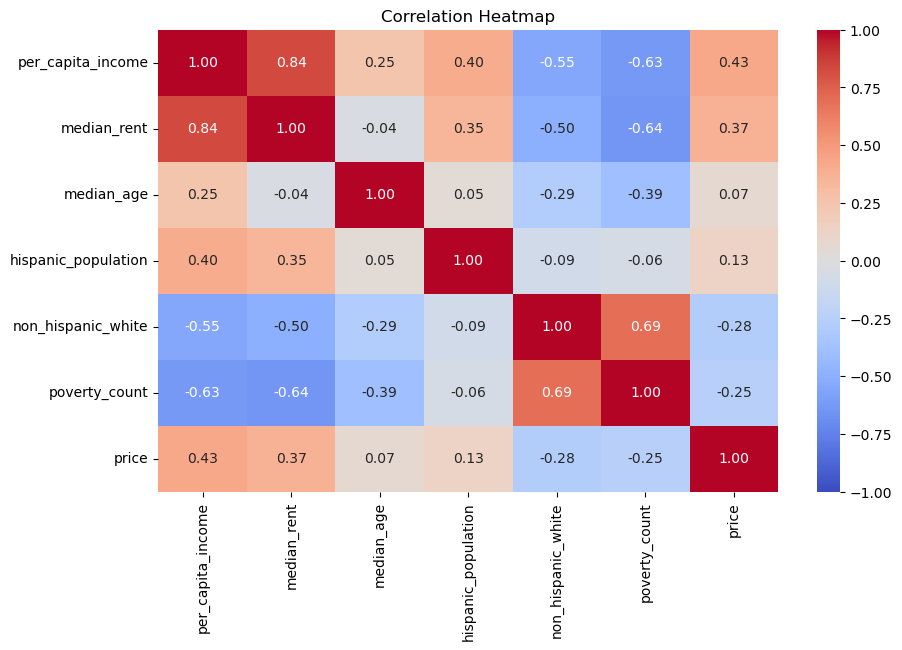

In [98]:
#now, let's look at the correlation of all these
corr = tmp_df[['per_capita_income', 'median_rent', 'median_age', 'hispanic_population', 'non_hispanic_white', 'poverty_count', 'price']].corr()

# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Correlations to note:
- Price and Hispanic population have a moderately positive correlation with median rent and per capita income
- There's a strongly positive correlation between per capita income and median rent
- There's a moderately negative correlation between per capita income, median rent, and median age with poverty count and non-Hispanic white people

#### 2.4.1.2 Pair plots (linearity) <a id = "2_4_1_2"></a>

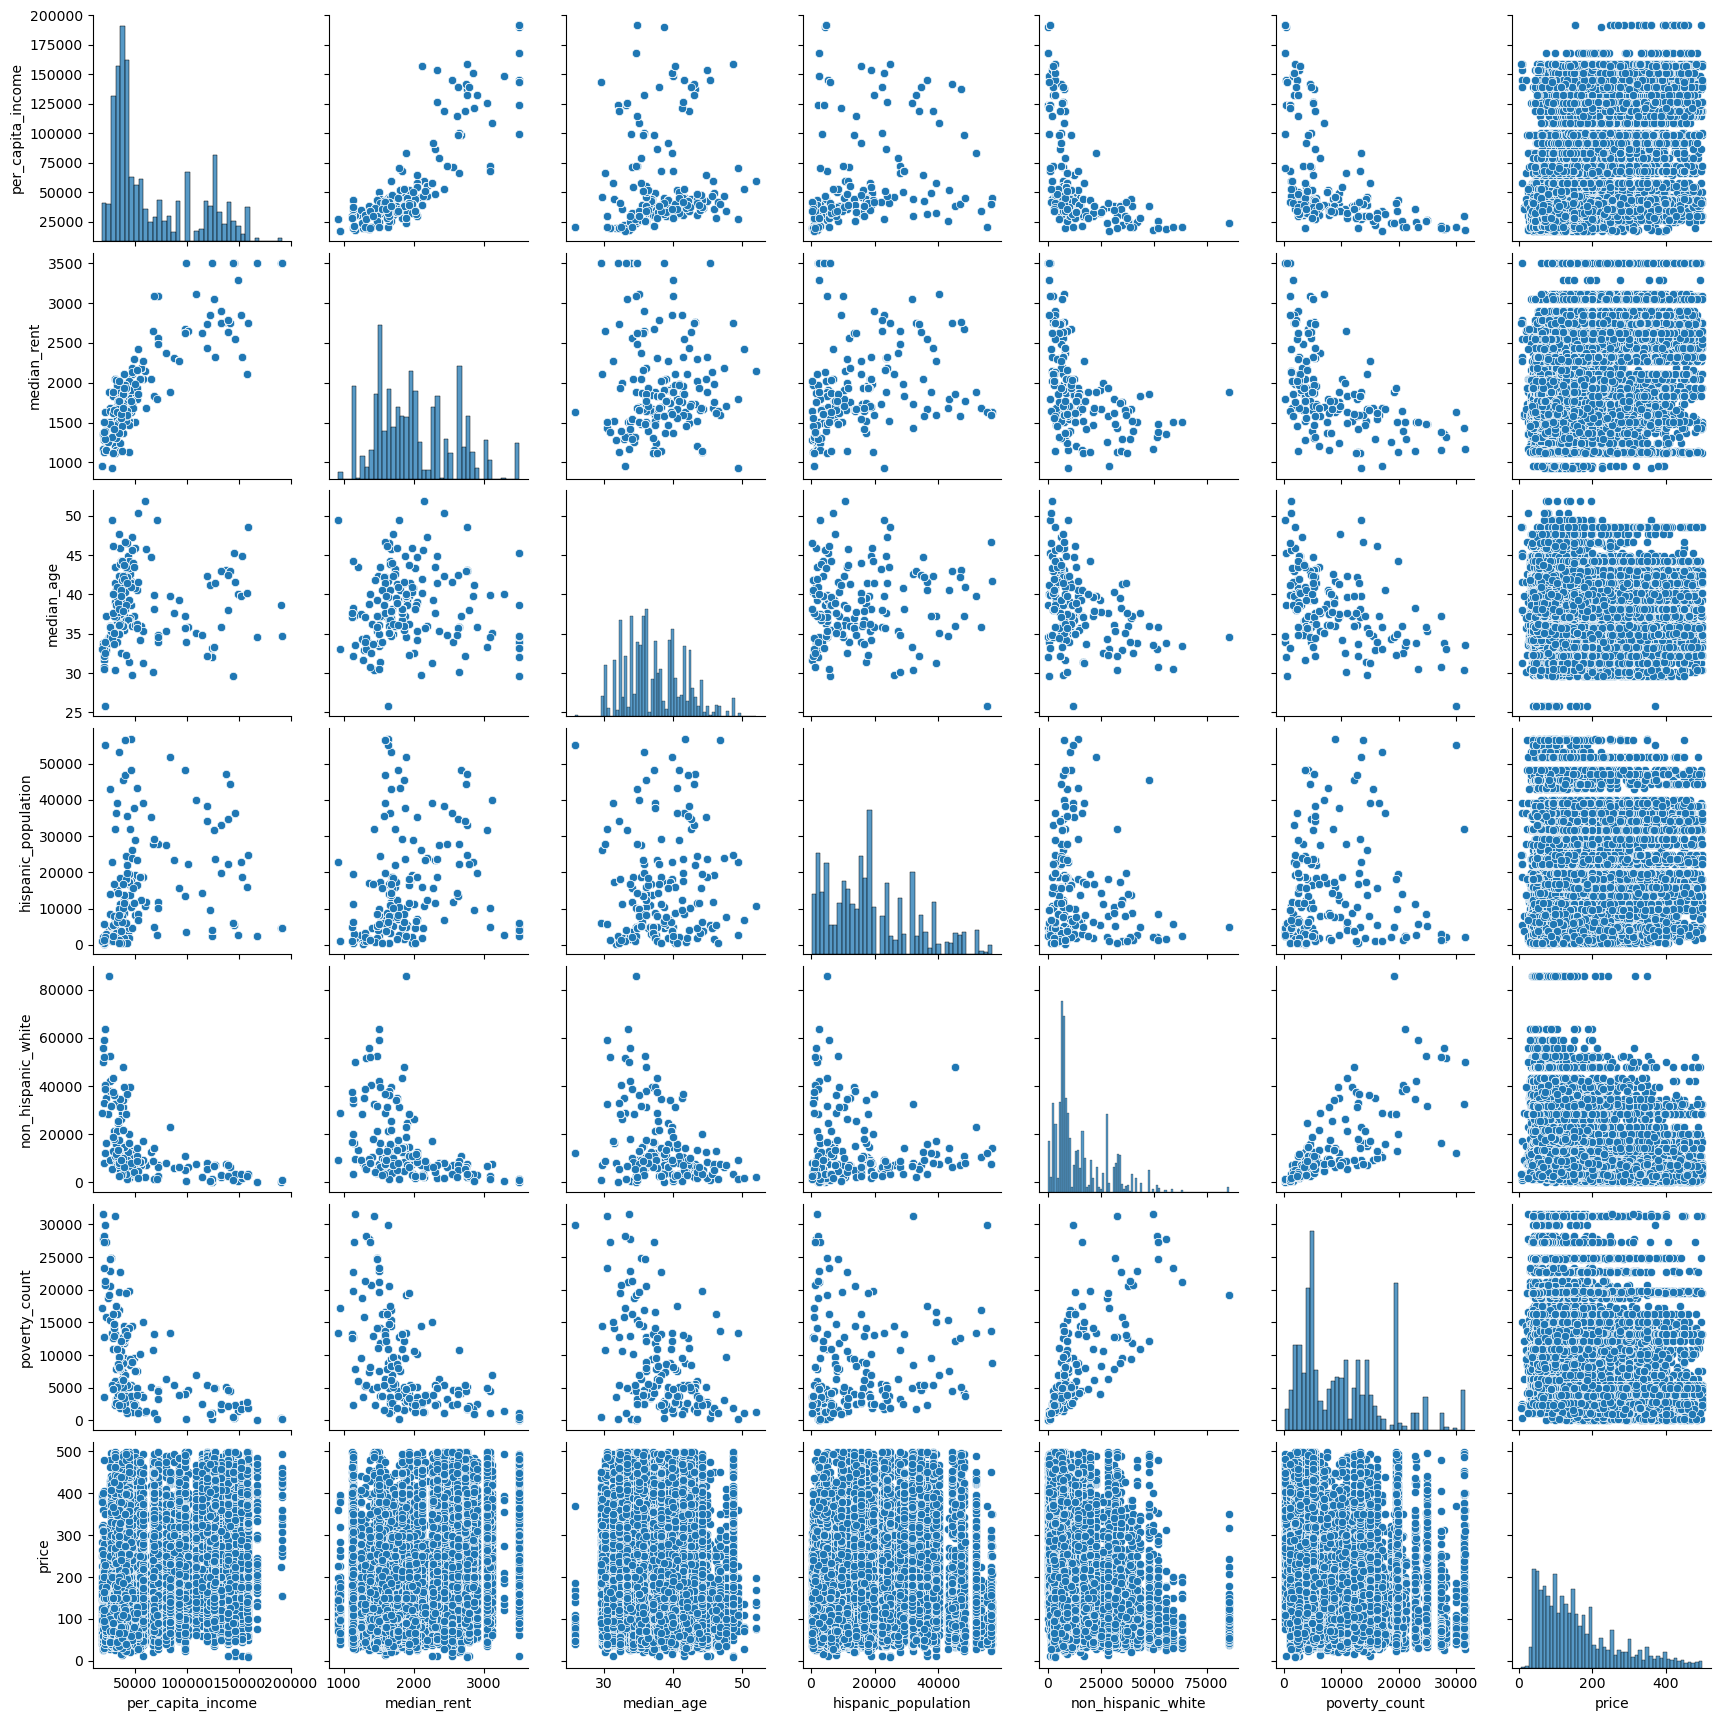

In [99]:
#let's take a closer look at the correlation using pair plots, there's a chance some of them might not be linear
sns.pairplot(tmp_df)
plt.show()

It looks like the correlation coefficients are right in some cases where the correlation is linear or without a clear correlation. However, there are some cases where correlation seems to be logarithmic, exponential, or reciprocal functions, which is good to keep in mind.

#### 2.4.1.3 Clustering based on Income and Rent <a id = "2_4_1_3"></a>

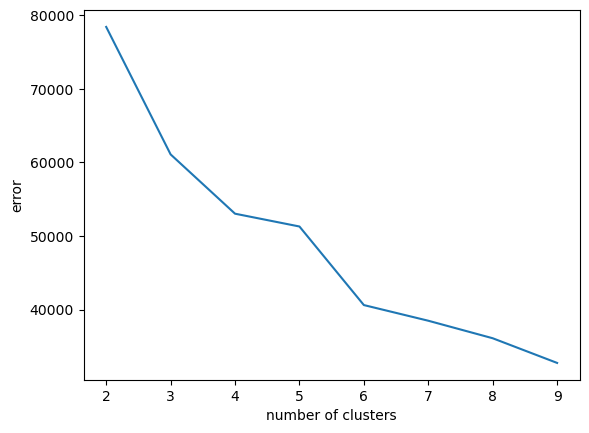

In [100]:
#now we see if we can cluster by group

#elbow method
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = tmp_df[['per_capita_income', 'median_rent', 'median_age', 'hispanic_population', 'poverty_count', 'non_hispanic_white']]
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

errors=[]
for n in range(2,10): 
    kmeans=KMeans(n) 
    kmeans.fit(scaled) 
    errors.append(kmeans.inertia_)

plt.plot(range(2,10),errors) 
plt.xlabel('number of clusters'); 
plt.ylabel('error');

C:\Users\Andre\AppData\Local\Temp\ipykernel_6540\2671744454.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df.loc[:,'cluster'] = kmeans.fit_predict(scaled)


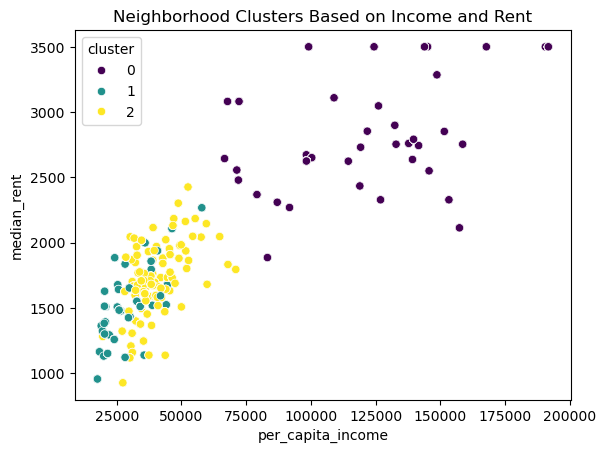

In [101]:
#fit K-means
kmeans = KMeans(n_clusters=3, random_state=42)
tmp_df.loc[:,'cluster'] = kmeans.fit_predict(scaled)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

#visualize clusters
sns.scatterplot(data=tmp_df, x='per_capita_income', y='median_rent', hue='cluster', palette='viridis')
plt.title('Neighborhood Clusters Based on Income and Rent')
plt.show()

There appears to be 3 clusters, one for zipcodes with high per capita income and high median rent (0), another for zipcodes with medium per capita income and low to medium rent (2), and another group with low per capita income and low to medium rent (1). Let's see which neighborhoods are in which cluster.

In [102]:
neighborhood_cluster = tmp_df.groupby('cluster')['neighbourhood_cleansed'].unique().reset_index()
pd.set_option('display.max_colwidth', None)
neighborhood_cluster

,cluster,neighbourhood_cleansed
0,0,"[South Slope, Sunnyside, Bedford-Stuyvesant, Kips Bay, Downtown Brooklyn, Murray Hill, Williamsburg, Upper East Side, Midtown, East Village, SoHo, Hell's Kitchen, Upper West Side, Carroll Gardens, Greenpoint, Chelsea, Long Island City, Park Slope, West Village, Little Italy, Roosevelt Island, Prospect Heights, Crown Heights, Clinton Hill, Windsor Terrace, Financial District, Nolita, Morningside Heights, Tribeca, Fort Greene, Vinegar Hill, Chinatown, Gramercy, Theater District, Ditmars Steinway, Flatiron District, Gowanus, Sunset Park, Stuyvesant Town, Battery Park City, Astoria, Brooklyn Heights, Red Hook, Greenwich Village, Boerum Hill, DUMBO, NoHo, Cobble Hill, Lower East Side, Columbia St, Two Bridges, East Harlem, Civic Center]"
1,1,"[Sunset Park, Brownsville, Bedford-Stuyvesant, Williamsburg, Harlem, Crown Heights, Bushwick, Ridgewood, Morningside Heights, Morris Heights, Washington Heights, Mount Hope, East New York, Highbridge, Longwood, Fort Greene, Cypress Hills, East Harlem, Kingsbridge, Concourse, Belmont, Far Rockaway, Corona, Elmhurst, Bay Ridge, Mott Haven, Borough Park, Morrisania, East Flatbush, Fieldston, Fordham, Clason Point, Williamsbridge, Tremont, Edgemere, Olinville, Spuyten Duyvil, Norwood, Van Nest, Jackson Heights, University Heights, Port Morris, Bensonhurst, Clinton Hill, Concourse Village, Claremont Village, Mount Eden, Forest Hills, Woodside, Flatbush, Midwood, Bayswater, Glendale, Unionport, Morris Park, Marble Hill, Dyker Heights, Parkchester, Melrose, Kensington, Greenpoint, Upper East Side, Allerton, West Farms, East Morrisania, Prospect Heights, Bronxdale, Woodhaven, Castle Hill, Boerum Hill, Soundview, Riverdale, Brooklyn Heights, Park Slope]"
2,2,"[Fort Hamilton, Morris Heights, East Harlem, Bedford-Stuyvesant, East Village, Bath Beach, Flatlands, Lower East Side, Mill Basin, Canarsie, Springfield Gardens, Gravesend, Washington Heights, Flatbush, Inwood, Flushing, Crown Heights, Maspeth, East Flatbush, Sheepshead Bay, Astoria, East Elmhurst, Rego Park, Sunnyside, Woodside, Bensonhurst, Harlem, Throgs Neck, Dongan Hills, Bayside, Allerton, Queens Village, Jamaica, Jamaica Estates, Baychester, Williamsbridge, Rockaway Beach, Schuylerville, Grant City, Forest Hills, Arverne, South Ozone Park, Bay Ridge, Kensington, Clifton, Chinatown, Oakwood, St. Albans, Cambria Heights, Wakefield, Ditmars Steinway, Richmond Hill, Chelsea, Staten Island, Willowbrook, Prospect-Lefferts Gardens, Rosedale, Sunset Park, Long Island City, Middle Village, Tompkinsville, West Brighton, Elmhurst, Woodhaven, Port Richmond, Ozone Park, Two Bridges, Gramercy, Midtown, Coney Island, College Point, Brighton Beach, Edenwald, Belle Harbor, Hunts Point, Bellerose, Laurelton, Gerritsen Beach, New Dorp Beach, New Springville, Morris Park, City Island, Mariners Harbor, Fresh Meadows, Co-op City, Briarwood, South Beach, Jamaica Hills, Pelham Gardens, Rosebank, Bull's Head, Jackson Heights, Arden Heights, North Riverdale, Windsor Terrace, Midwood, St. George, Dyker Heights, Financial District, Kew Gardens Hills, Kew Gardens, ...]"


- Now we can see the wealthier neighborhoods with higher rent (0) and not as wealthy with lower rents (1,2).
- Next, to see if rent and listing prices are related, we create a price to rent ratio.
    - If the ratio is over 1, it means that specific Airbnb listing is more expensive than the median renting price in that area.
    - If the ratio is between 0 and 1, then staying in that AirBnB would generally be cheaper than renting in that zipcode.

In [103]:
# price-to-rent
tmp_df.loc[:,'price_to_rent_ratio'] = tmp_df['price'] / (tmp_df['median_rent']/30.5)
tmp_df.head()

C:\Users\Andre\AppData\Local\Temp\ipykernel_6540\4092471155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df.loc[:,'price_to_rent_ratio'] = tmp_df['price'] / (tmp_df['median_rent']/30.5)


,neighbourhood_cleansed,per_capita_income,median_rent,median_age,hispanic_population,non_hispanic_white,poverty_count,price,cluster,price_to_rent_ratio
0,Fort Hamilton,52048.0,1801.0,40.6,43362.0,14178.0,7636.0,89.0,2,1.507218
1,Sunset Park,25708.0,1641.0,36.0,13974.0,38012.0,20513.0,45.0,1,0.836380
2,Morris Heights,35363.0,1623.0,40.3,8924.0,31339.0,7806.0,107.0,2,2.010783
3,East Harlem,30083.0,1116.0,37.1,5033.0,16604.0,13268.0,140.0,2,3.826165
4,South Slope,98246.0,2673.0,37.2,48203.0,10855.0,4189.0,340.0,0,3.879536


In [104]:
# price-to-rent ratio
cluster_ratio = tmp_df.groupby('neighbourhood_cleansed')['price_to_rent_ratio'].mean()
cluster_ratio[cluster_ratio<1]

neighbourhood_cleansed
Little Neck    0.842333
Name: price_to_rent_ratio, dtype: float64

There is only one neighborhood with a price to rent ratio less than 1, meaning that in all other neighborhoods, living in an Airbnb is more expensive than renting. This makes sense because Airbnbs are typically for people traveling and not for people living in NYC longterm. In addition, this price difference could be because Airbnbs are furnished while apartments are not typically furnished.
- Now we see if different clusters have different price to rent ratios

#### 2.4.1.4 Clustering Visualized <a id = "2_4_1_4"></a>

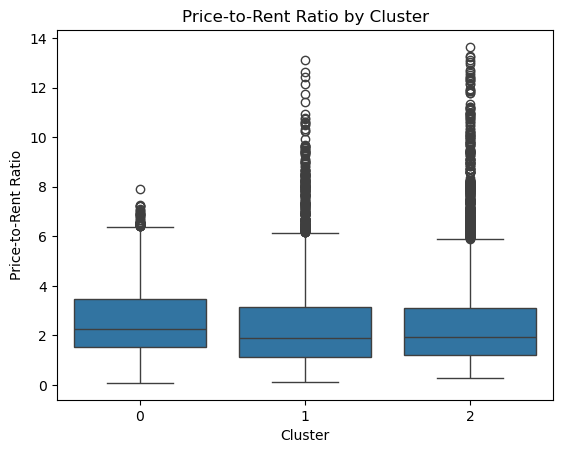

In [105]:
# Visualization
sns.boxplot(x='cluster', y='price_to_rent_ratio', data=tmp_df)
plt.title('Price-to-Rent Ratio by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Price-to-Rent Ratio')
plt.show()

While cluster 0 (the one with higher income and rent) has a slightly higher median price to rent ratio, the difference is not by a lot. This means airbnb prices typically follow rent trends, and actually increase more than rent in more wealthy areas when compared to less wealthy areas. 

#### 2.4.2 Commute and Transportation <a id = "2_4_2"></a>
- We will be taking a look at columns like workers public tranist, vehicels available, and commute times to determine if that has an effect on prices

Questions to consider:
- Can hosters charge a premium for being close to transporation systems? (subways)
- Can hosters account for heavy road traffic as a way to change their prices?
- We will be conducting statistical test to test these hypothesis

In [302]:
pd.set_option('display.max_columns', None)

df.columns

Index(['neighbourhood_cleansed', 'price', 'room_type', 'property_type',
       'accommodates', 'bedrooms', 'beds', 'bathrooms', 'amenities',
       'host_is_superhost', 'neighbourhood_group_cleansed',
       'calculated_host_listings_count', 'zip_code', 'total_population',
       'median_income', 'median_rent', 'median_home_value', 'vacant_units',
       'total_units', 'avg_commute_time', 'median_age', 'non_hispanic_white',
       'hispanic_population', 'per_capita_income', 'poverty_count',
       'median_year_built', 'rent_burden_30_50', 'total_housing_units',
       'bachelors_degree', 'workers_public_transit', 'vehicles_available',
       'price_per_person', 'cluster'],
      dtype='object')

In [304]:
# get all relevant columns related to these census data
tmp_df = df[['neighbourhood_cleansed','price','avg_commute_time', 'vehicles_available', 'workers_public_transit']]
tmp_df

,neighbourhood_cleansed,price,avg_commute_time,vehicles_available,workers_public_transit
0,Fort Hamilton,89.0,28537.0,30179.0,28537.0
1,Sunset Park,45.0,36683.0,27907.0,36683.0
2,Morris Heights,107.0,17098.0,16541.0,17098.0
3,East Harlem,140.0,12539.0,14833.0,12539.0
4,South Slope,340.0,29437.0,29465.0,29437.0
...,...,...,...,...,...
22644,Throgs Neck,110.0,18510.0,16168.0,18510.0
22645,Jamaica,65.0,9965.0,6136.0,9965.0
22646,East Elmhurst,367.0,12784.0,9736.0,12784.0
22647,East Elmhurst,89.0,12784.0,9736.0,12784.0


In [305]:
tmp_df.describe()

,price,avg_commute_time,vehicles_available,workers_public_transit
count,20894.000000,20894.000000,20894.000000,20894.000000
mean,162.655691,24313.652675,23907.171724,24313.652675
std,107.860710,10294.814469,9160.441255,10294.814469
min,8.000000,0.000000,0.000000,0.000000
25%,80.000000,16085.000000,16488.000000,16085.000000
50%,135.000000,24252.000000,26048.000000,24252.000000
75%,215.000000,29437.000000,32091.000000,29437.000000
max,499.000000,52779.000000,41653.000000,52779.000000


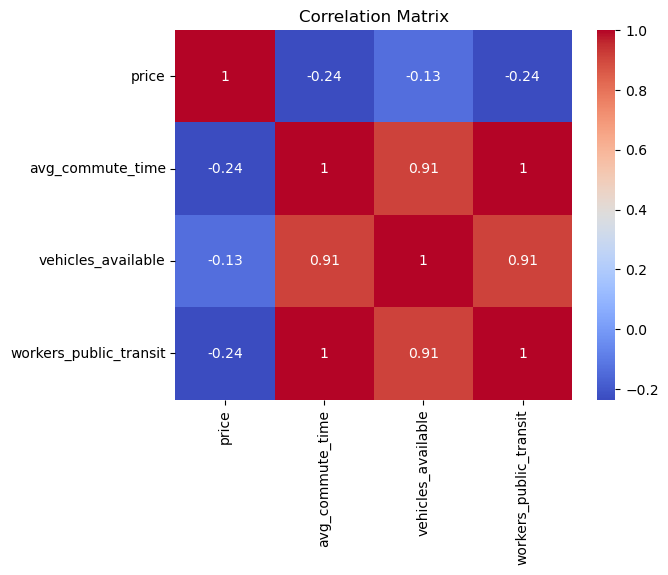

In [307]:
correlation_matrix = tmp_df[['price', 'avg_commute_time', 'vehicles_available', 'workers_public_transit']].corr()

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#### There seems to be a weak-moderate negative relationship between education/commutes to the price of the listings
- Price decreases with commute time or vehicle availability.
- Attributes like education and public transit might have secondary effects (e.g., on demand or neighborhood appeal).
- We should look into the relationship between these predictor variables and verify that there is an inverse relationship

#### 2.4.2.1 Splitting Price Tiers <a id = "2_4_2_1"></a>
- With this much datapoints, we can try grouping the prices into 4 different quantiles and see if we get a better wholistic view based off that
- Perhaps their are different spending habits with higher or lower prices?

C:\Users\Andre\AppData\Local\Temp\ipykernel_6540\1900398893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['price_tier'] = pd.qcut(tmp_df['price'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])


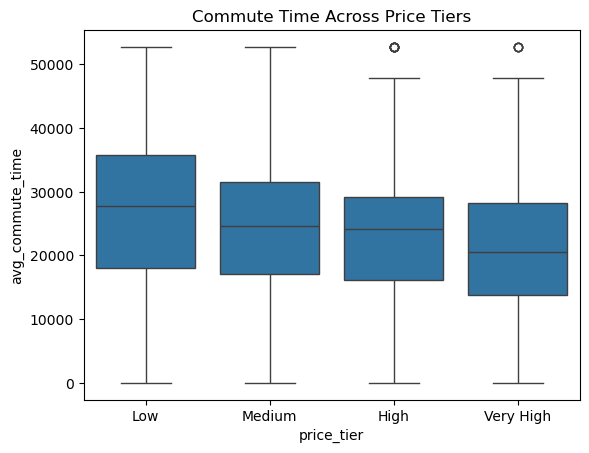

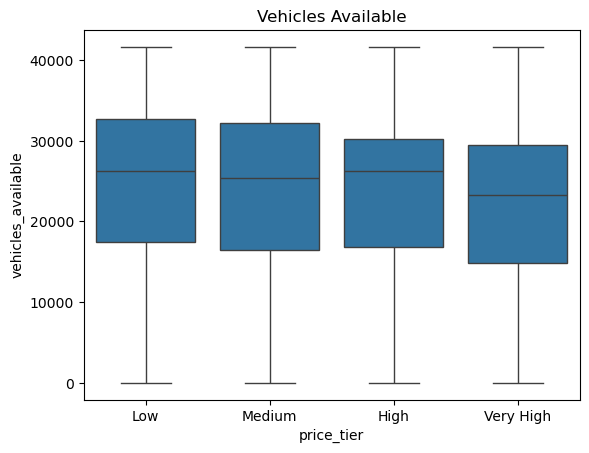

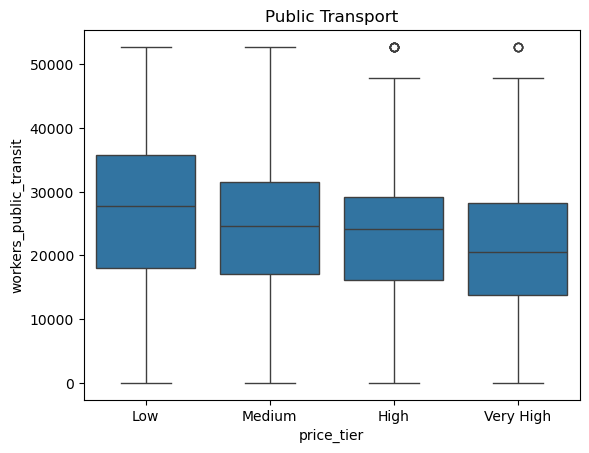

In [308]:
# we can get 4 quarters of price range
tmp_df['price_tier'] = pd.qcut(tmp_df['price'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])   

sns.boxplot(data=tmp_df, x='price_tier', y='avg_commute_time')
plt.title('Commute Time Across Price Tiers')
plt.show()

sns.boxplot(data=tmp_df, x='price_tier', y='vehicles_available')
plt.title('Vehicles Available')
plt.show()

sns.boxplot(data=tmp_df, x='price_tier', y='workers_public_transit')
plt.title('Public Transport')
plt.show()

#### Suprising observation
- The higher the price range, the less commute times from work
- Population density could play a significant role. 
  - High-price areas may have fewer people overall, or they could cater to more affluent individuals, influencing commute times.
- And if there are fewer affluent individuals, it could also mean an older demographic who don't have the same background?

#### We will conduct a few statistical test to analyze these commute trends

#### 2.4.2.2 Transit Access Premium <a id = "2_4_2_2"></a>

hypothesize that high-transit areas may allow for a premium due to their accessibility
- H₀ (Null): There is no difference in prices between high-transit and low-transit areas.
- H₁ (Alternative): High-transit areas charge higher prices.
- test with a .99% confidence

In [312]:
from scipy.stats import ttest_ind

high_transit = tmp_df[tmp_df['workers_public_transit'] > tmp_df['workers_public_transit'].median()]['price']
low_transit = tmp_df[tmp_df['workers_public_transit'] <= tmp_df['workers_public_transit'].median()]['price']

t_stat, p_value = ttest_ind(high_transit, low_transit, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.01:
    print("Reject the null hypothesis: Areas with high transit access charge a premium.")
else:
    print("Fail to reject the null hypothesis: No evidence that transit access affects price.")


T-statistic: -32.98784586737379, P-value: 1.575617237945722e-232
Reject the null hypothesis: Areas with high transit access charge a premium.


Ok, so being closer to transit systems does give listers a leeway to charge more. We will analyze how much more later on

#### 2.4.2.3 Shorter Commute Time Premium <a id = "2_4_2_3"></a>
We hypothesize that shorter commutes may align with higher prices due to proximity to economic hubs. We will divide our groups into 3 groups to test this
- H₀ (Null): There is no difference in prices between areas with low, medium, and high commute times.
- H₁ (Alternative): Commute time impacts price.

In [319]:
from scipy.stats import f_oneway

tmp_df['commute_bin'] = pd.qcut(tmp_df['avg_commute_time'], q=3, labels=['Low', 'Medium', 'High'])

low_traffic = tmp_df[tmp_df['commute_bin'] == 'Low']['price']
medium_traffic = tmp_df[tmp_df['commute_bin'] == 'Medium']['price']
high_traffic = tmp_df[tmp_df['commute_bin'] == 'High']['price']

# ANOVA
f_stat, p_value = f_oneway(low_traffic, medium_traffic, high_traffic)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

if p_value < 0.01:
    print("Reject the null hypothesis: Commute time impacts price.")
else:
    print("Fail to reject the null hypothesis: No evidence commute time affects price.")b

F-statistic: 328.8088597181256, P-value: 2.5212178999628482e-141
Reject the null hypothesis: Commute time impacts price.


C:\Users\Andre\AppData\Local\Temp\ipykernel_6540\122070226.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['commute_bin'] = pd.qcut(tmp_df['avg_commute_time'], q=3, labels=['Low', 'Medium', 'High'])


Ok, so it seems like commute and transit time does have an effect on prices (premium)
Just how much more are we able to pay for with

In [320]:
import statsmodels.api as sm

X = tmp_df[['workers_public_transit', 'avg_commute_time']]
X = sm.add_constant(X)  
y = tmp_df['price']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1229.
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          8.92e-262
Time:                        17:38:55   Log-Likelihood:            -1.2685e+05
No. Observations:               20894   AIC:                         2.537e+05
Df Residuals:                   20892   BIC:                         2.537e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    222

- By looking at the coefficients, we can assume that for every additional minute of commute time, the price decreases by $0.072 (.0012 per second) for both public transit time and avg_commute time
- Listers should take advantage of the fact that their listings  are closter to transit!


## 2.5 Findings and Conclusions  <a id = "2_5"></a>

#### Rooms and Accomodations:
- General Insights:
    - Accommodates and price show a moderately positive correlation (0.42), stronger than beds (0.30).
    - Listings with more accommodations and/or beds generally cost more, though exceptions exist.
    - Bathrooms and bedrooms have little association with higher prices
    - On average, accommodating one extra person raises the price by $53, setting other variables equal
        - The model explains 51% of price variance, indicating room for further factor exploration.
    - Listings were sorted into budget friendly for small groups, budget friendly for large groups, and luxury for small groups
- Clusters:
    - Cluster 0 (Budget-Friendly Small Groups):
        - Price correlates strongly with accommodates (0.64) and price per person (0.61).
        - Focus: Maximize occupancy with efficient, affordable amenities for budget-conscious guests.
    - Cluster 1 (Luxury Small Groups):
        - Price heavily influenced by accommodates (0.71); minimal impact from beds and bathrooms.
        - Focus: Enhance exclusivity and luxury features to justify premium pricing for discerning travelers.
    - Cluster 2 (Budget-Friendly Large Groups):
        - Larger listings charge less per person (negative correlation: -0.33), with strong overall price correlation (0.85).
        - Focus: Optimize for group capacity, adding functional features (e.g., parking, large dining areas) and emphasizing affordability in marketing.

#### Amentities:
- General Insights:
    - Smoke alarms, kitchens, Wi-Fi, carbon monoxide alarms, hot water, essentials, hangers, refrigerators, hair dryers, and air conditioning are the most common, essential, amenities.
    - A moderate positive correlation exists between price and amenities like cribs, gyms, high chairs, elevators, and dishwashers
        - These amenities are considered nice-to-have rather than essential.
        - Hosts can consider adding these to potentially increase revenue, but should weigh the costs.
    - A weaker correlation exists between price and amenities like pet-friendliness, hair dryers, shampoo, in-unit washers, and in-unit dryers. While less certain, these amenities may still influence pricing.
    - The regression model explains 40% of the variance in price, indicating a moderately meaningful relationship between amenities and price.
- Clusters:


#### Neighborhoods:
- Manhattan: Tribeca is the most expensive, while Inwood is the cheapest.
- Brooklyn: DUMBO is the most expensive, while Borough Park is the cheapest.
- Queens: Deponsit is the most expensive, while Jamaica Estates is the cheapest.
- Staten Island: Grymes Hill is the most expensive, while Grant City is the cheapest.
- Bronx: Port Morris is the most expensive, while Bronxdale is the cheapest.

#### Demographic:
- Price, Hispanic population, median rent, and per capita income are positively correlated.
- Per capita income and median rent are strongly positively correlated.
- Per capita income, median rent, and median age are negatively correlated with poverty count and non-Hispanic white population.
- Listings were sorted into high per capita income and high median rent, medium per capita income and low to medium rent, and low per capita income, low to medium rent.
    - Different neighborhoods are grouped into each cluster
- All neighborhoods have a price-to-rent ratio greater than 1, indicating that Airbnb stays are generally more expensive than traditional rentals.
- The price-to-rent ratio is slightly higher in the high-income, high-rent cluster, suggesting that Airbnb prices increase more rapidly than rent in wealthier areas.

#### Transit Times:
- The location of nearby transit systems and commute times to work does have a moderate/weak correlation with price. For every minute saved commuting, the listing can increaase their price by $0.072.
- Hosts can expect to charge slightly higher premiums if their listings are closer to any subway, bus, or other transportation systems.



### 2.6 Exporting 
- Let's export everything and see if there is anything fun to export

In [52]:
pd.DataFrame(df).to_csv('modeling', index=False)